## Importing libraries

In [1]:
#load the libraries
import pandas as pd
import numpy as np

### Importing csv file

In [2]:
data = pd.read_csv("Regrerssion_energy_production_data (1).csv",delimiter=";")

In [3]:
data.head()

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0         9.59           38.56       1017.01       60.10             481.30
1        12.04           42.34       1019.72       94.67             465.36
2        13.87           45.08       1024.42       81.69             465.48
3        13.72           54.30       1017.89       79.08             467.05
4        15.14           49.64       1023.78       75.00             463.58

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


### Checking for Null values

In [5]:
data.isna().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

### Checking for duplicate entries

In [6]:
data[data.duplicated()]

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
2066        10.72           41.17       1019.68       60.71             479.21
2780        28.41           75.60       1018.48       56.07             440.28
3333        24.79           75.60       1017.07       68.23             440.05
3467         7.64           41.17       1020.01       75.14             488.53
3550        25.42           75.60       1017.39       77.63             438.24
3747        11.61           41.17       1019.57       58.82             476.81
4292        12.27           41.17       1019.41       58.10             475.13
4528        24.63           59.57       1010.45       85.36             440.67
5065         8.57           41.17       1020.18       72.47             484.20
5564        11.82           41.17       1019.50       55.74             475.61
5812        25.21           75.60       1017.19       69.84             445.84
5975         7.87           41.17       1020.33       77.77             486.20
5983         6.86           41.17       1020.12       79.14             490.23
6413        28.84           75.60       1018.41       53.96             442.69
6861        11.23           41.17       1019.36       56.85             475.85
6948        25.56           75.60       1017.37       69.31             442.20
7065         9.83           41.17       1019.34       72.29             478.21
7124        26.12           75.60       1017.41       72.31             439.68
7231        29.23           75.60       1017.72       52.26             438.92
7274        12.19           41.17       1019.43       65.47             475.64
7453        26.45           75.60       1017.42       74.50             436.89
7675         6.06           41.17       1019.67       84.70             489.62
7732        29.51           75.60       1017.92       50.61             431.18
7779        12.11           41.17       1019.46       62.59             475.53
7821        28.37           75.60       1017.48       55.19             439.25
7839         8.44           41.17       1019.90       70.72             486.15
7843        29.05           75.60       1017.63       51.16             439.14
7907         8.07           41.17       1019.40       86.43             484.54
7948        26.85           75.60       1017.43       74.55             433.48
8212        27.54           75.60       1018.26       57.89             440.87
8290         7.24           41.17       1020.35       80.56             486.76
8542        25.79           75.60       1017.46       75.63             434.65
8777        25.53           59.57       1010.65       82.04             445.59
8879         9.54           41.17       1019.79       65.61             481.18
9028         6.40           41.17       1019.54       85.37             488.82
9154        29.45           75.60       1018.12       50.68             437.31
9163         6.03           41.17       1019.81       84.20             488.57
9272        12.00           41.17       1019.48       58.71             474.40
9482        12.27           41.17       1019.39       52.18             473.84
9521        27.64           75.60       1017.35       54.78             441.04
9537        25.91           75.60       1018.23       62.65             443.20

In [7]:
#removing duplicate entries
cleaned_data = data.drop_duplicates()

In [8]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9527 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9527 non-null   float64
 1   exhaust_vacuum     9527 non-null   float64
 2   amb_pressure       9527 non-null   float64
 3   r_humidity         9527 non-null   float64
 4   energy_production  9527 non-null   float64
dtypes: float64(5)
memory usage: 446.6 KB


In [9]:
cleaned_data.describe()

temperature  exhaust_vacuum  amb_pressure   r_humidity  \
count  9527.000000     9527.000000   9527.000000  9527.000000   
mean     19.658225       54.293421   1013.237084    73.334951   
std       7.444397       12.686309      5.940526    14.607513   
min       1.810000       25.360000    992.890000    25.560000   
25%      13.530000       41.740000   1009.085000    63.375000   
50%      20.350000       52.080000   1012.920000    75.000000   
75%      25.710000       66.510000   1017.200000    84.850000   
max      37.110000       81.560000   1033.300000   100.160000   

       energy_production  
count         9527.00000  
mean           454.33591  
std             17.03908  
min            420.26000  
25%            439.75000  
50%            451.52000  
75%            468.36500  
max            495.76000

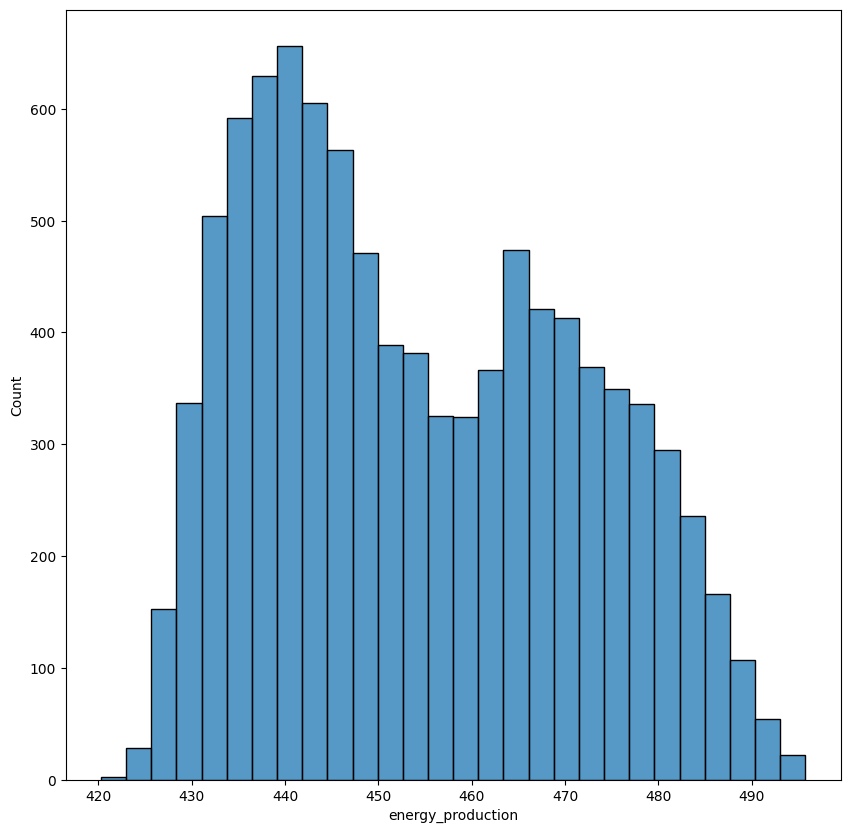

In [10]:
# Analyzing the target variable
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
sns.histplot(data['energy_production'])
plt.show()

In [11]:
print(f"The target has a skewness of {data['energy_production'].skew()}")
print(f"The target has  a peakedness of {data['energy_production'].kurtosis()}")

The target has a skewness of 0.30650943542040227
The target has  a peakedness of -1.0485209686925079


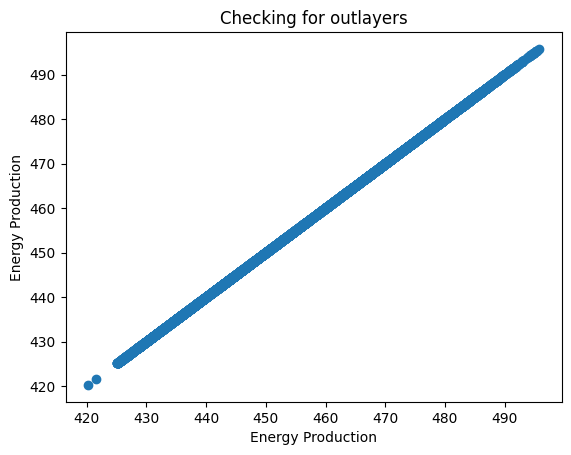

In [12]:
plt.scatter(data["energy_production"], data["energy_production"])

plt.xlabel('Energy Production')
plt.ylabel('Energy Production')
plt.title("Checking for outlayers")

plt.show()

<ipython-input-13-078938527c56>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= target_transformed)


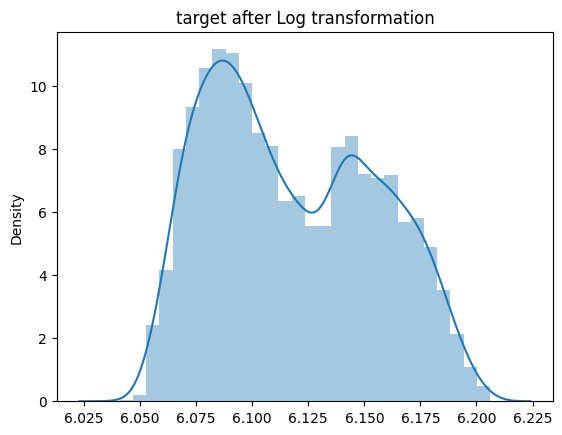

In [13]:
target = data['energy_production']
target_transformed = np.log(target)

sns.distplot(x= target_transformed)

plt.title("target after Log transformation")
plt.show()

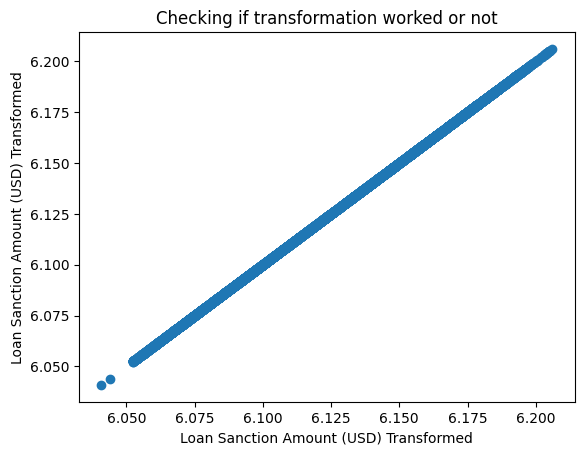

In [14]:
plt.scatter(target_transformed, target_transformed)
plt.xlabel('Loan Sanction Amount (USD) Transformed')
plt.ylabel('Loan Sanction Amount (USD) Transformed')
plt.title("Checking if transformation worked or not")
plt.show()

In [15]:
print(f"The target has a skewness of {target_transformed.skew()} after transformation")
print(f"The target has a peakedness of {target_transformed.kurtosis()} after transformation")

The target has a skewness of 0.2587171223404053 after transformation
The target has a peakedness of -1.0841009577551084 after transformation


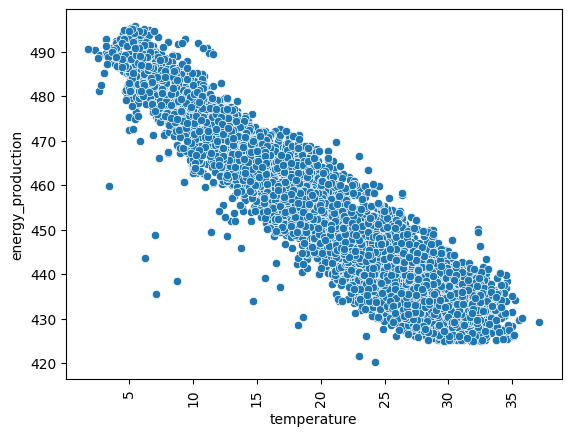

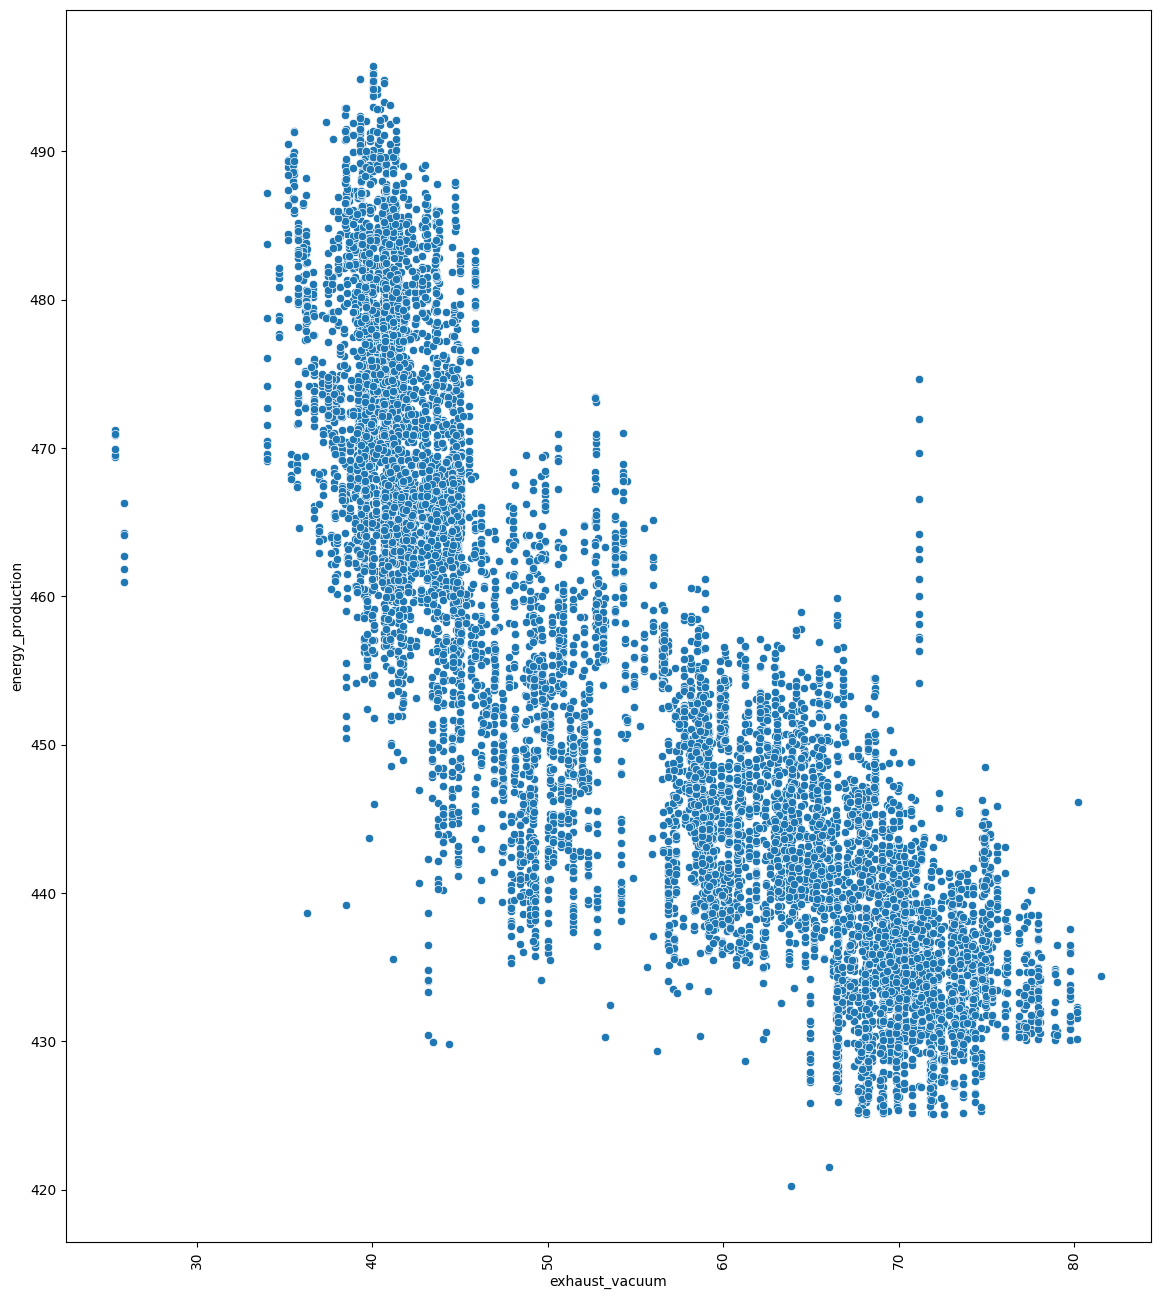

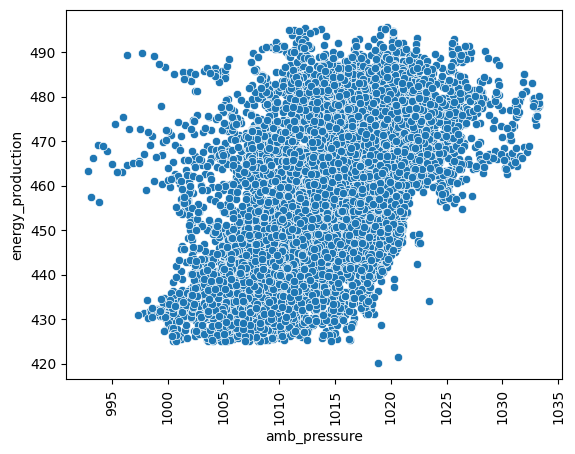

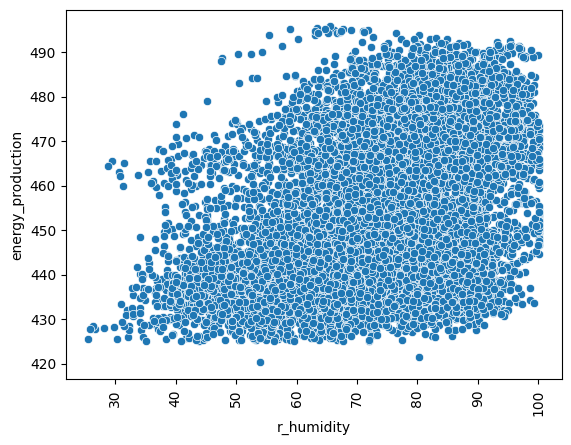

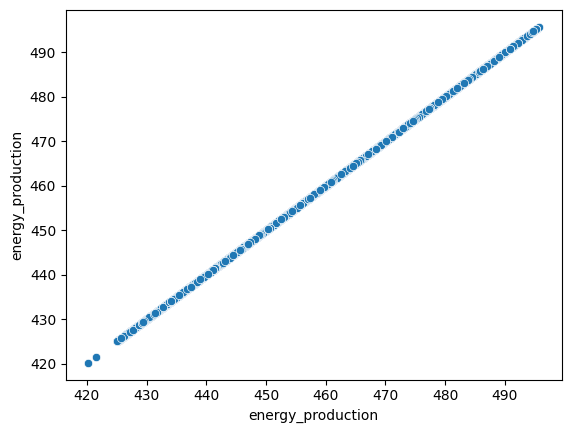

In [16]:
plt.figure(figsize=(14, 16))
for index, col in enumerate(data):
    plt.xticks(rotation=90)
    plt.figure(index)
    sns.scatterplot(x=col, y='energy_production', data=data)

## Outlier detection

<Axes: >

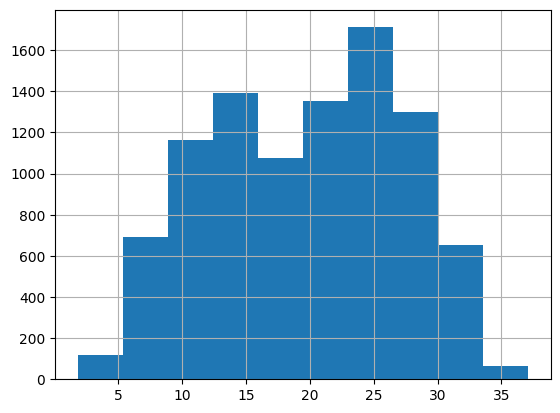

In [17]:
#histogram of temperature
cleaned_data['temperature'].hist()

<Axes: >

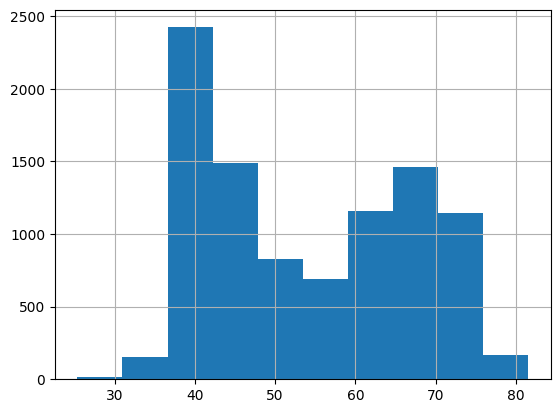

In [18]:
#histogram of exhaust vaccum
cleaned_data['exhaust_vacuum'].hist()

<Axes: >

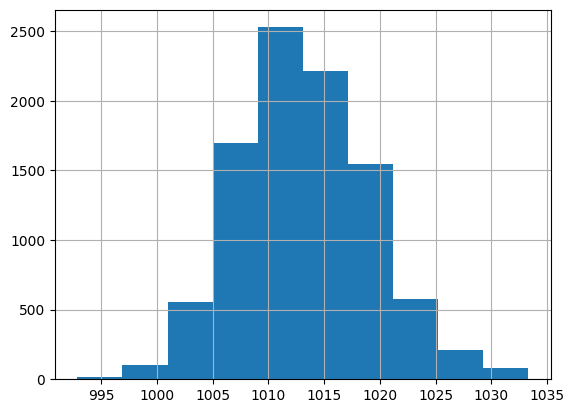

In [19]:
#histogram of amb_pressure
cleaned_data['amb_pressure'].hist()

<Axes: >

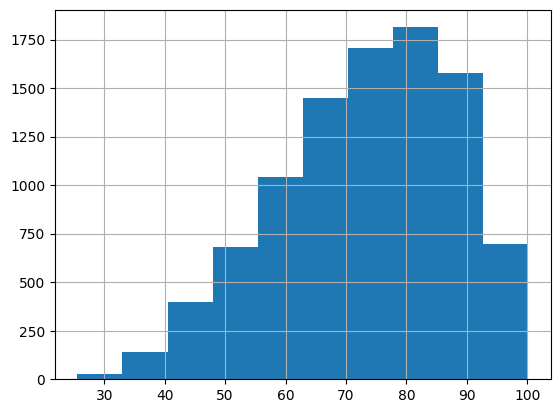

In [20]:
#histogram of r_humidity
cleaned_data['r_humidity'].hist()

<Axes: >

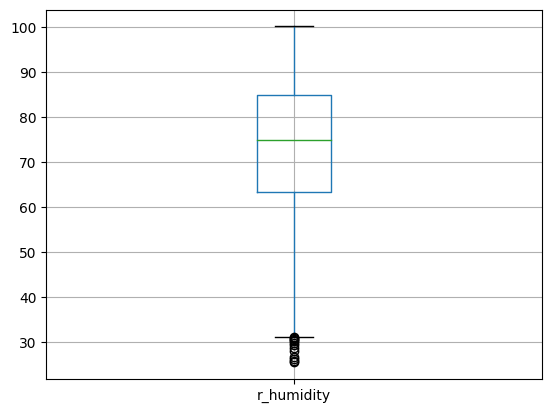

In [21]:
#Boxplot for r_humidity
cleaned_data.boxplot(column=['r_humidity'])

# Scatter plot and Correlation analysis

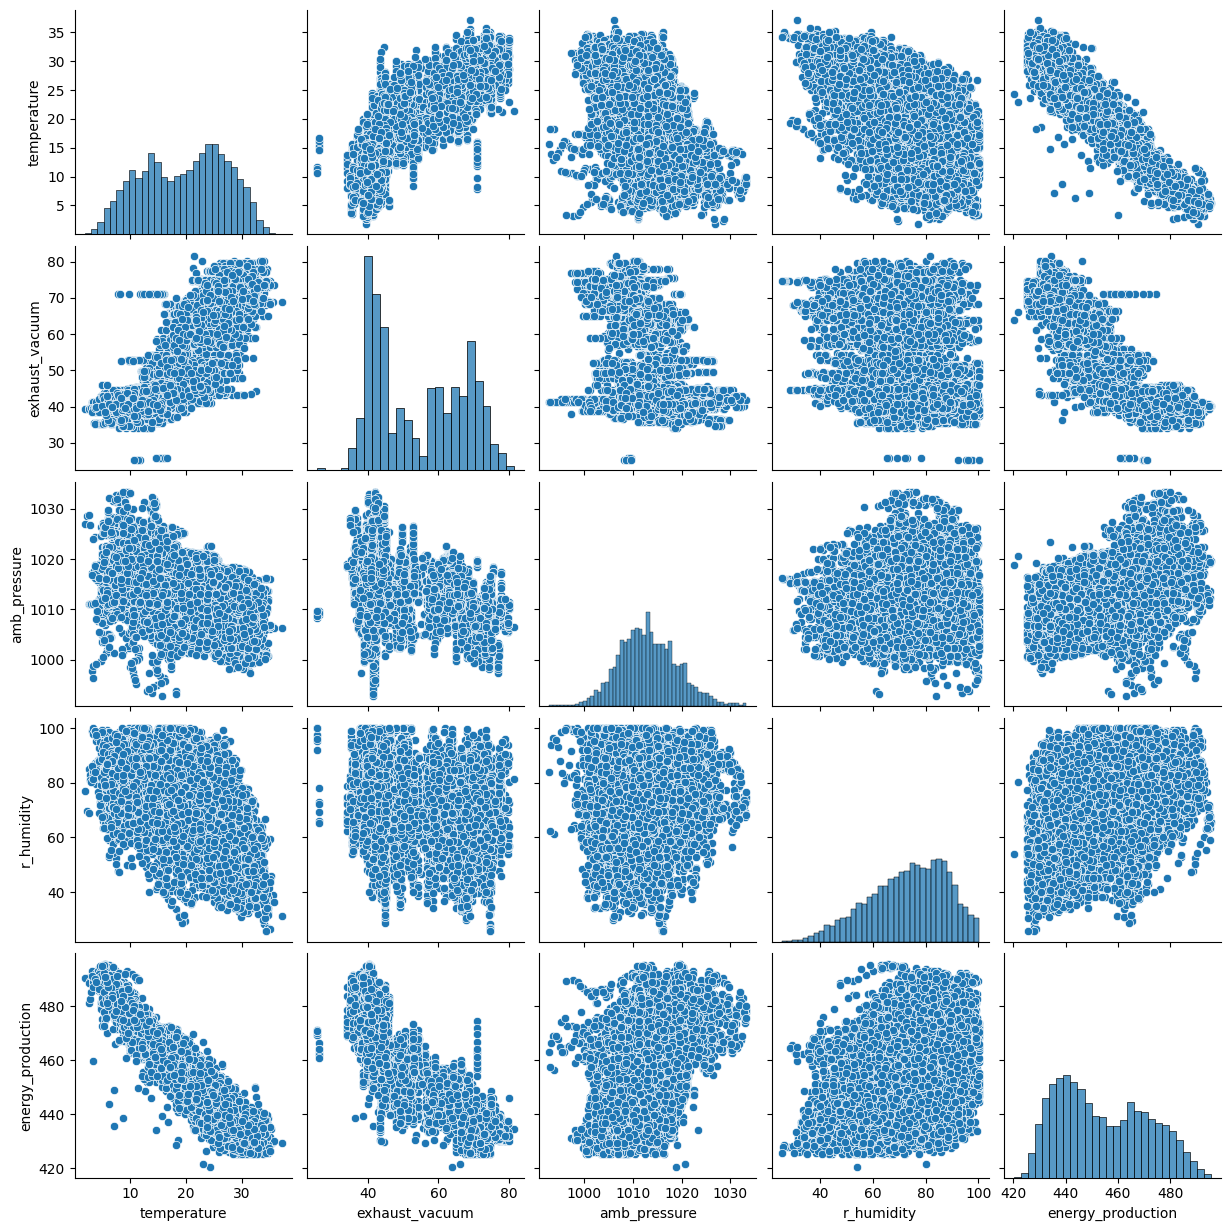

In [22]:
# Seaborn visualization library
import seaborn as sns
sns.pairplot(cleaned_data)

In [23]:
cleaned_data.corr()

temperature  exhaust_vacuum  amb_pressure  r_humidity  \
temperature           1.000000        0.843689     -0.508222   -0.543947   
exhaust_vacuum        0.843689        1.000000     -0.415718   -0.312214   
amb_pressure         -0.508222       -0.415718      1.000000    0.101631   
r_humidity           -0.543947       -0.312214      0.101631    1.000000   
energy_production    -0.947908       -0.869900      0.518687    0.391175   

                   energy_production  
temperature                -0.947908  
exhaust_vacuum             -0.869900  
amb_pressure                0.518687  
r_humidity                  0.391175  
energy_production           1.000000

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data.iloc[:,0:4]
Y = data.iloc[:,4:5]

In [25]:
X

temperature  exhaust_vacuum  amb_pressure  r_humidity
0            9.59           38.56       1017.01       60.10
1           12.04           42.34       1019.72       94.67
2           13.87           45.08       1024.42       81.69
3           13.72           54.30       1017.89       79.08
4           15.14           49.64       1023.78       75.00
...           ...             ...           ...         ...
9563        17.10           49.69       1005.53       81.82
9564        24.73           65.34       1015.42       52.80
9565        30.44           56.24       1005.19       56.24
9566        23.00           66.05       1020.61       80.29
9567        17.75           49.25       1020.86       63.67

[9568 rows x 4 columns]

In [26]:
Y

energy_production
0                481.30
1                465.36
2                465.48
3                467.05
4                463.58
...                 ...
9563             457.32
9564             446.92
9565             429.34
9566             421.57
9567             454.41

[9568 rows x 1 columns]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)



In [28]:
from sklearn.preprocessing  import StandardScaler
SS = StandardScaler()
X1 = SS.fit_transform(X_train)


In [29]:
X1_train = pd.DataFrame(X1, columns = [['temperature','exhaust_vacuum','amb_pressure' ,'r_humidity']])


In [30]:
X1_train

temperature exhaust_vacuum amb_pressure r_humidity
0       0.095757       0.173859     1.178095  -0.226991
1      -0.146083      -1.039176    -1.902222  -0.562658
2      -0.887724      -1.026598     1.506256   0.441596
3      -1.611899      -1.124081     3.098006  -0.148737
4      -0.124586      -0.091075    -0.000917   0.637230
...          ...            ...          ...        ...
7171    1.922988       2.033112    -0.501617  -1.144068
7172    1.263304       1.289411    -0.628483  -0.465184
7173   -1.728788      -1.268733     0.767047   0.533579
7174    0.286541      -0.950341    -0.039823  -0.406151
7175    0.446424      -0.731790    -0.178530  -1.547692

[7176 rows x 4 columns]

In [31]:
Y_train

energy_production
2058             456.04
8042             459.97
7612             466.02
1166             479.43
3597             455.70
...                 ...
5734             432.22
5191             437.95
5390             484.31
860              462.51
7270             450.37

[7176 rows x 1 columns]

In [32]:
Y_test

energy_production
2513             429.31
9411             427.69
8745             453.30
9085             449.63
4950             435.34
...                 ...
4427             487.63
3297             445.67
1244             440.17
3614             444.26
5651             440.09

[2392 rows x 1 columns]

In [33]:
X_test_sesl =  SS.transform(X_test)

In [34]:
X_test_scaled = pd.DataFrame(X_test_sesl, columns = [['temperature','exhaust_vacuum','amb_pressure' ,'r_humidity']])

In [35]:
X_test_scaled

temperature exhaust_vacuum amb_pressure r_humidity
0       1.712050       1.158123    -2.115357  -1.888163
1       1.143728       1.385321    -1.105501  -0.353295
2      -0.277751       0.611746     1.056303   0.877483
3       0.054106      -0.387455     1.244065   0.376385
4       0.872330       1.485163    -1.885306   1.281106
...          ...            ...          ...        ...
2387   -1.673702      -1.238859     0.545454  -0.205025
2388    0.418209       0.351529    -0.308780   0.762848
2389    0.884422       1.032338     0.073511  -2.012408
2390    0.672141       0.351529    -0.582811   0.041405
2391    0.779625       0.844448     0.093810  -1.210652

[2392 rows x 4 columns]

In [36]:
data

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9568 rows x 5 columns]

In [37]:
#Model Building

In [38]:
import statsmodels.formula.api as smf
model = smf.ols("energy_production~temperature + exhaust_vacuum + amb_pressure + r_humidity",data = data).fit()

In [39]:
model.params

Intercept         454.609274
temperature        -1.977513
exhaust_vacuum     -0.233916
amb_pressure        0.062083
r_humidity         -0.158054
dtype: float64

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 14 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:12:32   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        454.6093      9.749     46.634      0.000     435.500     473.718
temperature       -1.9775      0.015   -129.342      0.000      -2.007      -1.948
exhaust_vacuum    -0.2339      0.007    -32.122      0.000      -0.248      -0.220
amb_pressure       0.0621      0.009      6.564      0.000       0.044       0.081
r_humidity        -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
print(model.tvalues, '\n', model.pvalues)

Intercept          46.633709
temperature      -129.342024
exhaust_vacuum    -32.122109
amb_pressure        6.564086
r_humidity        -37.918473
dtype: float64 
 Intercept          0.000000e+00
temperature        0.000000e+00
exhaust_vacuum    4.375305e-215
amb_pressure       5.507109e-11
r_humidity        3.104584e-293
dtype: float64


In [42]:
model.resid

0        1.034971
1       -3.880233
2       -1.843785
3        1.579178
4       -1.183333
          ...    
9563    -1.344769
9564     1.803718
9565    -5.434507
9566   -22.778602
9567    -6.892722
Length: 9568, dtype: float64

In [43]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9286960898122537, 0.9286662648994909)

In [44]:
pred = model.predict(X)
pred

0       480.265029
1       469.240233
2       467.323785
3       465.470822
4       464.763333
           ...    
9563    458.664769
9564    445.116282
9565    434.774507
9566    444.348602
9567    461.302722
Length: 9568, dtype: float64

In [45]:
rmse_lin = np.sqrt(np.mean((np.array(data['energy_production'])-np.array(pred))**2))
rmse_lin

4.557126016749484

In [46]:
#Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train,Y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test_scaled)
Y_test_actual = Y_test.values

In [49]:
X_test_scaled

temperature exhaust_vacuum amb_pressure r_humidity
0       1.712050       1.158123    -2.115357  -1.888163
1       1.143728       1.385321    -1.105501  -0.353295
2      -0.277751       0.611746     1.056303   0.877483
3       0.054106      -0.387455     1.244065   0.376385
4       0.872330       1.485163    -1.885306   1.281106
...          ...            ...          ...        ...
2387   -1.673702      -1.238859     0.545454  -0.205025
2388    0.418209       0.351529    -0.308780   0.762848
2389    0.884422       1.032338     0.073511  -2.012408
2390    0.672141       0.351529    -0.582811   0.041405
2391    0.779625       0.844448     0.093810  -1.210652

[2392 rows x 4 columns]

In [50]:
X_test_scaled
t = X_test_scaled['temperature']
ex = X_test_scaled['exhaust_vacuum']
amb = X_test_scaled['amb_pressure']
hum = X_test_scaled['r_humidity']

In [51]:
#metrics


In [52]:
from sklearn.metrics import mean_squared_error,r2_score
r2score = r2_score(y_pred,Y_test_actual)
mse =  mean_squared_error(y_pred,Y_test_actual)

In [53]:
r2score

0.9235001046348503

In [54]:
mse

20.735886675515587

In [55]:
rmse = np.sqrt(mse)
rmse

4.553667387448889

In [56]:
MA = np.abs(Y_test_actual - y_pred)
mae = np.mean(MA)
print("Mean Absolute Errors", mae)

Mean Absolute Errors 3.6176317734493155


In [57]:
#Cross Validation

In [58]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
k = 5
result_linear = cross_val_score(model, X1_train,Y_train, cv=k,scoring='neg_mean_squared_error')
result_linear = -result_linear

In [59]:
result_linear

array([22.24891989, 20.0535789 , 21.1873026 , 20.48164042, 20.17800386])

In [60]:
average_mse = np.mean(result_linear)
average_mse

20.829889135553763

In [61]:
rmse = np.sqrt(average_mse)
rmse

4.5639773373181605

In [62]:
print("MSE Scores for Each Fold:", result_linear)
print("Average MSE:", average_mse)
print("RMSE:", rmse)

MSE Scores for Each Fold: [22.24891989 20.0535789  21.1873026  20.48164042 20.17800386]
Average MSE: 20.829889135553763
RMSE: 4.5639773373181605


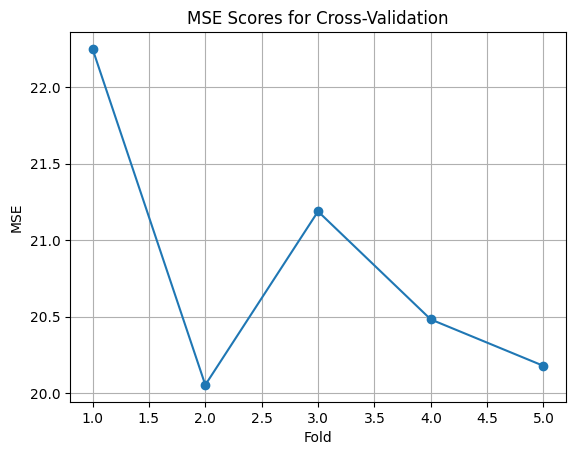

In [63]:
plt.plot(range(1, k + 1), result_linear, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.title('MSE Scores for Cross-Validation')
plt.grid(True)


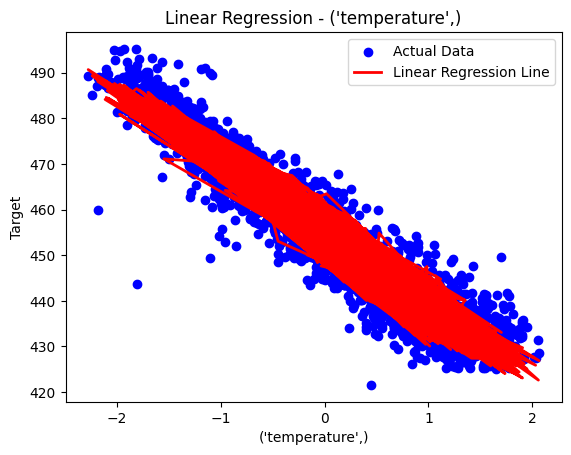

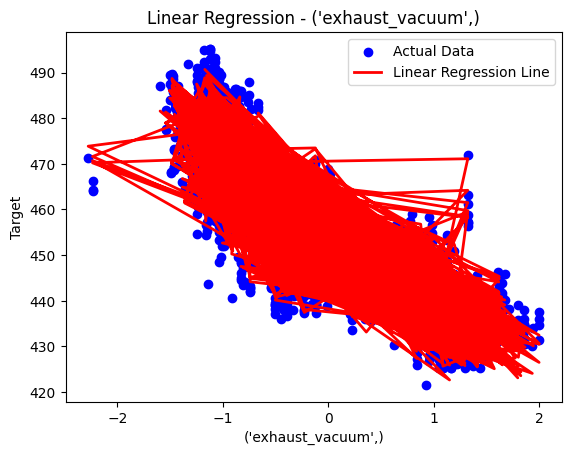

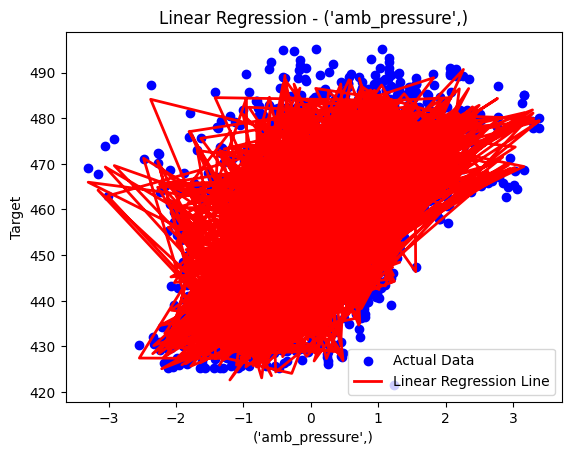

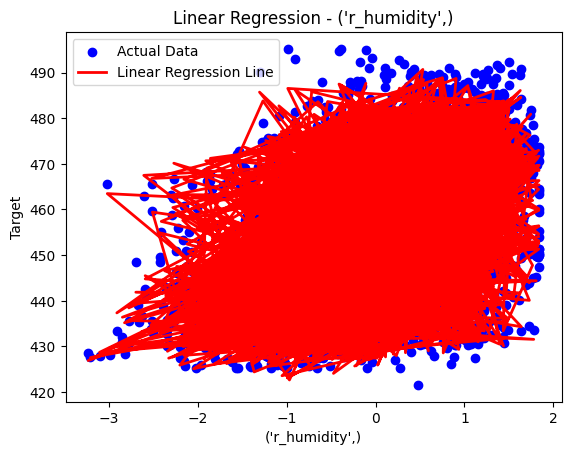

In [64]:
#Here the predicted values in the actual values
import seaborn as sns
for feature in X_test_scaled.columns:
    plt.figure()
    x_data = X_test_scaled[feature].values
    plt.scatter(x_data,Y_test,color='blue',label='Actual Data')
    plt.plot(x_data,y_pred, color='red', linewidth=2, label='Linear Regression Line' )
    plt.ylabel("Target")
    plt.xlabel(feature)
    plt.title(f"Linear Regression - {feature}")
    plt.legend()
    plt.show()

In [65]:
#lasso Regression


In [66]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [67]:
 # np.logspace it creates an array of 100 values that range of the 10 power exponents of -4 t0 +4
alphas = np.logspace(-4,4,100)
lasso_model = Lasso()


In [68]:
#Hyper parameter tunning
param_grid = {'alpha':alphas}
grid_search = GridSearchCV(lasso_model, param_grid, cv = 5, scoring='neg_mean_squared_error')
grid_search.fit(X1_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3....
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

In [69]:
best_alpha = grid_search.best_params_['alpha']
best_alpha

0.0003678379771828634

In [70]:
#Model building for lasso
lasso = Lasso(alpha = best_alpha)
lasso.fit(X1_train,Y_train)

Lasso(alpha=0.0003678379771828634)

In [71]:
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_lasso

array([429.48781125, 433.88929743, 454.88801967, ..., 442.95027809,
       443.20400786, 443.21944081])

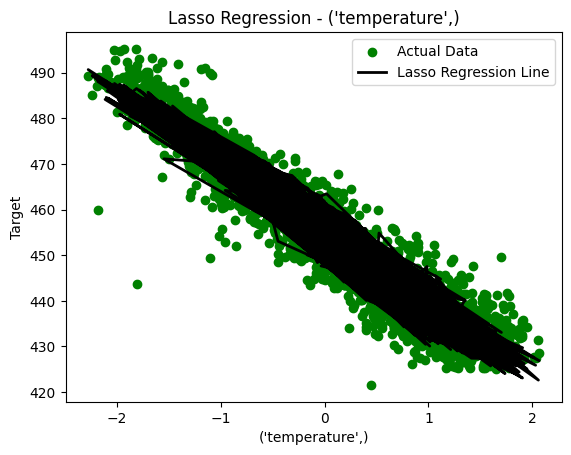

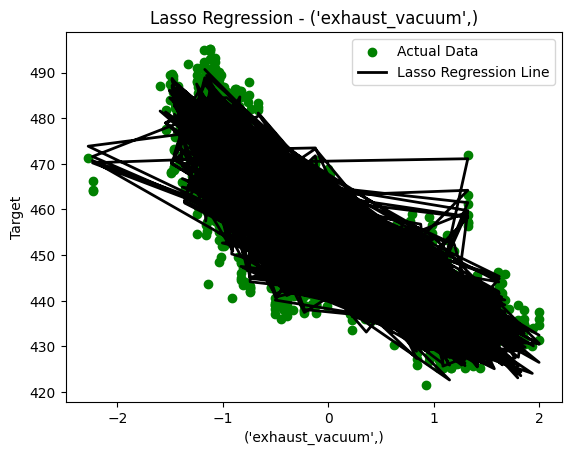

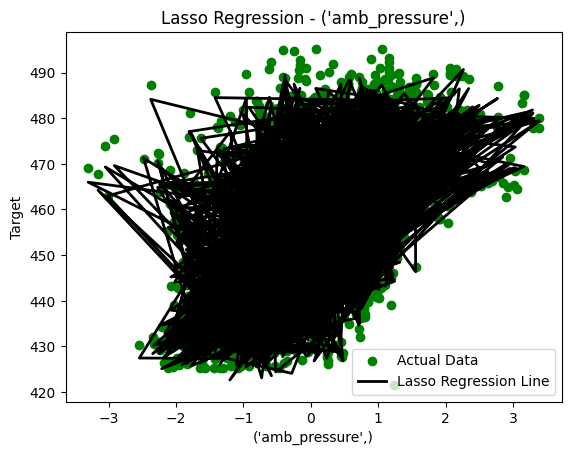

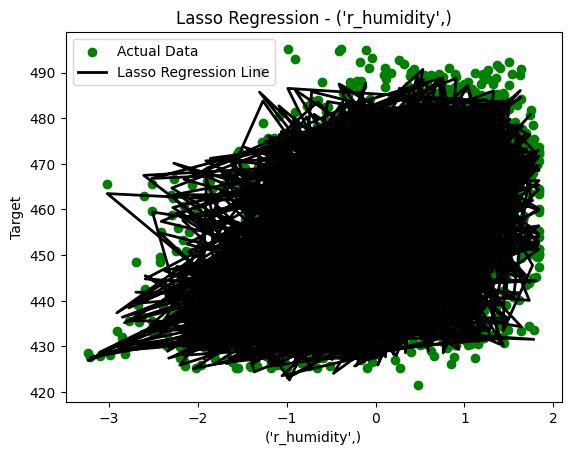

In [72]:
import seaborn as sns

for feature in X_test_scaled.columns:
    plt.figure()
    x_data = X_test_scaled[feature].values
    plt.scatter(x_data,Y_test,color='green',label='Actual Data')
    plt.plot(x_data,y_pred_lasso, color='black', linewidth=2, label='Lasso Regression Line' )
    plt.ylabel("Target")
    plt.xlabel(feature)
    plt.title(f"Lasso Regression - {feature}")
    plt.legend()
    plt.show()

In [73]:
#metrics

In [74]:
r2score_lasso = r2_score(y_pred_lasso,Y_test_actual)
mse_lasso =  mean_squared_error(y_pred_lasso,Y_test_actual)
rmse_lasso = np.sqrt(mse)
MA_lasso = np.abs(Y_test_actual - y_pred)
mae_lasso= np.mean(MA_lasso)
print("r2score", r2score_lasso)
print("Mean Squared Errors",mse_lasso)
print("Root Mean Squared errors",rmse_lasso)
print("Mean Absolute Errors", mae_lasso)

r2score 0.923503250433461
Mean Squared Errors 20.735580510438922
Root Mean Squared errors 4.553667387448889
Mean Absolute Errors 3.6176317734493155


In [75]:
#Cross_Validation

In [76]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.model_selection import cross_validate
k = 10
result_lasso = cross_val_score(lasso, X1_train,Y_train, cv=k,scoring='neg_mean_squared_error')
result_lasso_abs = cross_validate(lasso,X1_train,Y_train,cv=k, scoring = ['neg_mean_absolute_error', 'r2'])
result_lasso_mse_values = -result_lasso

In [77]:
result_lasso_mse = np.mean(result_lasso_mse_values)

In [78]:
result_lasso_abs

{'fit_time': array([0.00652099, 0.00614119, 0.0056982 , 0.00555372, 0.00589085,
        0.00589347, 0.00561476, 0.00580001, 0.00573659, 0.00551748]),
 'score_time': array([0.00511599, 0.00503016, 0.00495553, 0.00477648, 0.00519037,
        0.00482178, 0.0050714 , 0.00560689, 0.00490904, 0.00469017]),
 'test_neg_mean_absolute_error': array([-3.70410875, -3.67320252, -3.59441127, -3.58666347, -3.67719284,
        -3.65563702, -3.65818496, -3.60994073, -3.49540836, -3.6857449 ]),
 'test_r2': array([0.92386371, 0.92075557, 0.92815177, 0.93542012, 0.93215406,
        0.92507217, 0.92807992, 0.92990231, 0.93189967, 0.92167602])}

In [79]:
result_lasso_MAE_values = -result_lasso_abs['test_neg_mean_absolute_error']
result_lasso_MAE = np.mean(result_lasso_MAE_values)

In [80]:
result_r2_values = result_lasso_abs['test_r2']
result_r2  = np.mean(result_r2_values)

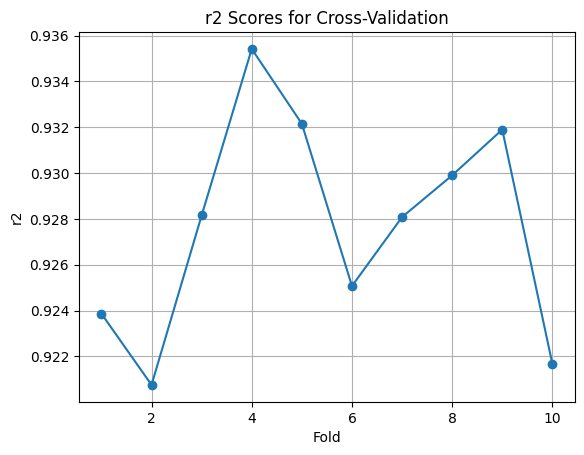

In [81]:
plt.plot(range(1, k + 1), result_r2_values, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('r2')
plt.title('r2 Scores for Cross-Validation')
plt.grid(True)


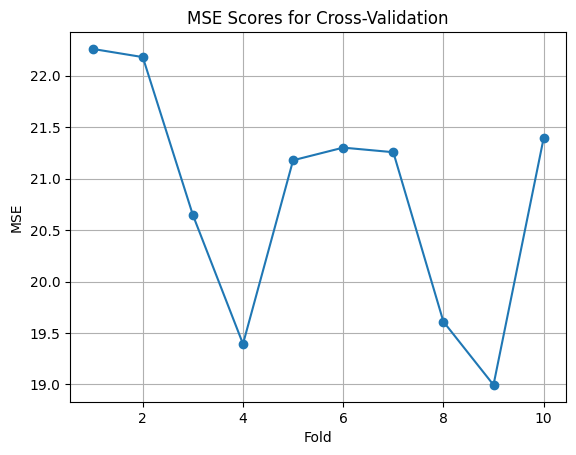

In [82]:
plt.plot(range(1, k + 1), result_lasso_mse_values, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.title('MSE Scores for Cross-Validation')
plt.grid(True)


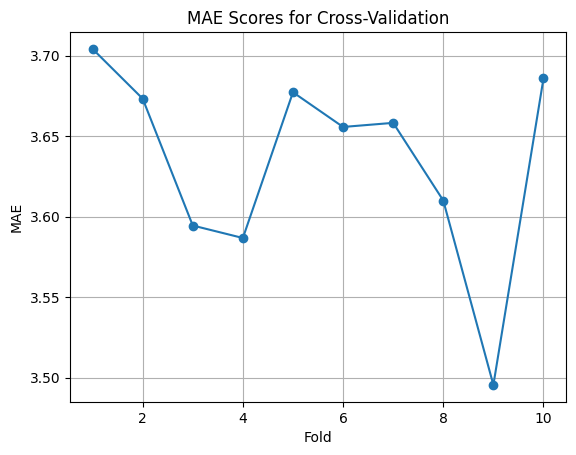

In [83]:
plt.plot(range(1, k + 1), result_lasso_MAE_values, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.title('MAE Scores for Cross-Validation')
plt.grid(True)

In [84]:
data_lasso = {

        'Before_cross_validation': [r2score_lasso,mse_lasso,mae_lasso],
        'After_cross_validation': [result_r2,result_lasso_mse,result_lasso_MAE]

}

In [85]:
Lasso_metrics = pd.DataFrame(data_lasso)

In [86]:
index = ['r2', 'MSE','MAE']
Lasso_metrics.index = index

In [87]:
Lasso_metrics

Before_cross_validation  After_cross_validation
r2                  0.923503                0.927698
MSE                20.735581               20.820981
MAE                 3.617632                3.634049

In [88]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()

In [89]:
#Hyper parameter tuning
alphas = np.logspace(-6,6,13)
param_grid = {
    "alpha" : alphas
}
grid = GridSearchCV(ridge, param_grid, cv = 5, n_jobs = -1)
grid.fit(X1_train,Y_train)
grid.best_params_

{'alpha': 1.0}

In [90]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X1_train,Y_train)


Ridge()

In [91]:
y_pred_ridge = ridge.predict(X_test_scaled)

In [92]:
y_pred_ridge

array([[429.48631358],
       [433.88797508],
       [454.88615359],
       ...,
       [442.94497623],
       [443.20843641],
       [443.21784051]])

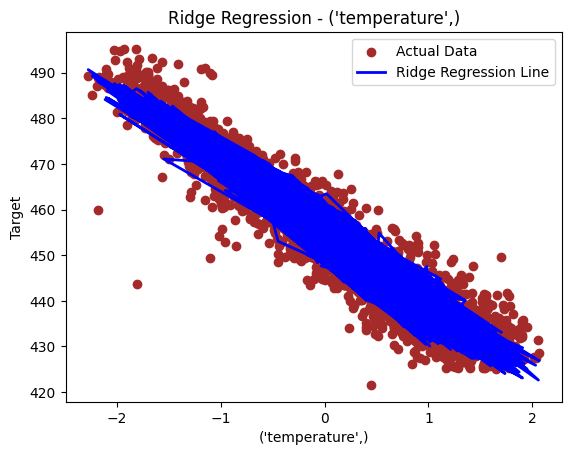

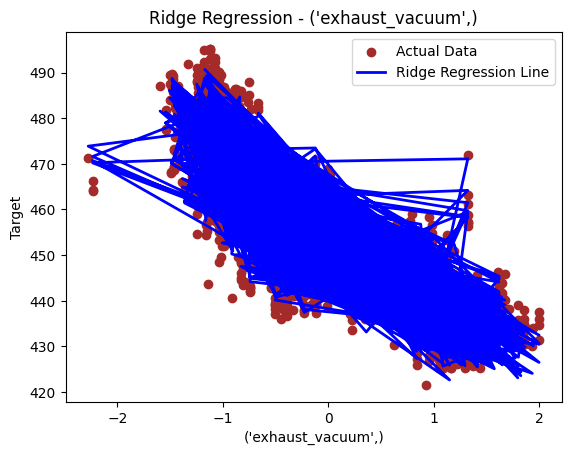

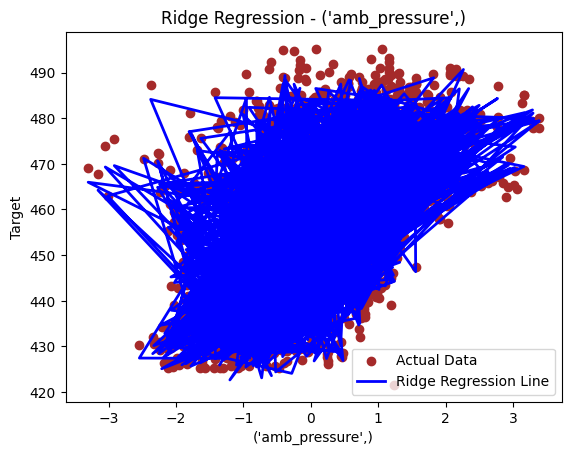

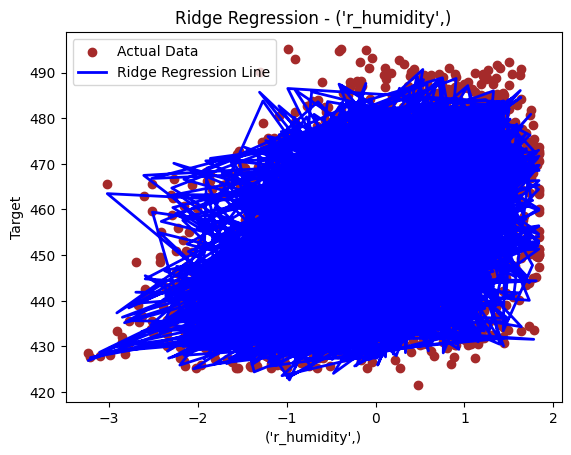

In [93]:
for feature in X_test_scaled.columns:
    plt.figure()
    x_data = X_test_scaled[feature].values
    plt.scatter(x_data,Y_test,color='brown',label='Actual Data')
    plt.plot(x_data,y_pred_ridge, color='blue', linewidth=2, label='Ridge Regression Line' )
    plt.ylabel("Target")
    plt.xlabel(feature)
    plt.title(f"Ridge Regression - {feature}")
    plt.legend()
    plt.show()

In [94]:
#metrics

In [95]:
r2score_ridge = r2_score(y_pred_ridge,Y_test_actual)
mse_ridge =  mean_squared_error(y_pred_ridge,Y_test_actual)
rmse_ridge = np.sqrt(mse)
MA_ridge = np.abs(Y_test_actual - y_pred)
mae_ridge= np.mean(MA_ridge)
print("r2score", r2score_ridge)
print("Mean Squared Errors",mse_ridge)
print("Root Mean Squared errors",rmse_ridge)
print("Mean Absolute Errors", mae_ridge)

r2score 0.9234763651740462
Mean Squared Errors 20.73739234970706
Root Mean Squared errors 4.553667387448889
Mean Absolute Errors 3.6176317734493155


In [96]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.model_selection import cross_validate
k = 10
result_ridge = cross_val_score(ridge, X1_train,Y_train, cv=k,scoring='neg_mean_squared_error')
result_ridge_abs = cross_validate(ridge,X1_train,Y_train,cv=k, scoring = ['neg_mean_absolute_error', 'r2'])
result_ridge_mse_values = -result_ridge

In [97]:
result_ridge_mse = np.mean(result_ridge_mse_values)

In [98]:
result_ridge_abs

{'fit_time': array([0.003721  , 0.00349927, 0.00348639, 0.00337815, 0.00434208,
        0.00357556, 0.00336576, 0.00328064, 0.00322843, 0.0032959 ]),
 'score_time': array([0.00344849, 0.00345778, 0.00359297, 0.00346899, 0.00353956,
        0.00338888, 0.00327516, 0.00324702, 0.00323534, 0.00325346]),
 'test_neg_mean_absolute_error': array([-3.70388445, -3.67321634, -3.5947338 , -3.58710133, -3.67761231,
        -3.65581213, -3.65822706, -3.61014421, -3.49526933, -3.68616027]),
 'test_r2': array([0.9238686 , 0.92076478, 0.92814457, 0.93541142, 0.93214765,
        0.92507245, 0.92807806, 0.929897  , 0.93191593, 0.92167561])}

In [99]:
result_ridge_MAE_values = -result_ridge_abs['test_neg_mean_absolute_error']
result_ridge_MAE = np.mean(result_ridge_MAE_values)

In [100]:
result_r2_values_ridge = result_ridge_abs['test_r2']
result_r2_ridge  = np.mean(result_r2_values)

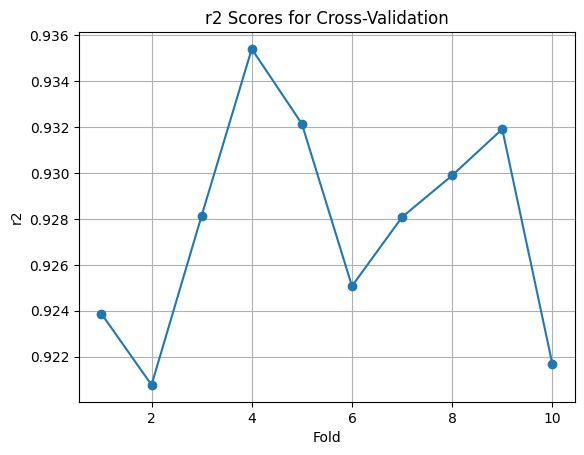

In [101]:
plt.plot(range(1, k + 1), result_r2_values_ridge, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('r2')
plt.title('r2 Scores for Cross-Validation')
plt.grid(True)


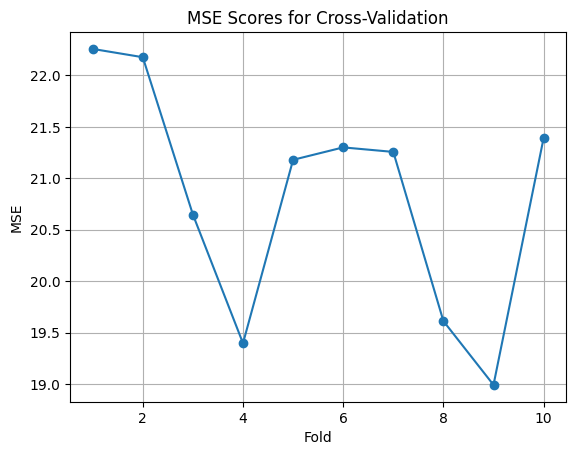

In [102]:
plt.plot(range(1, k + 1), result_ridge_mse_values, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.title('MSE Scores for Cross-Validation')
plt.grid(True)

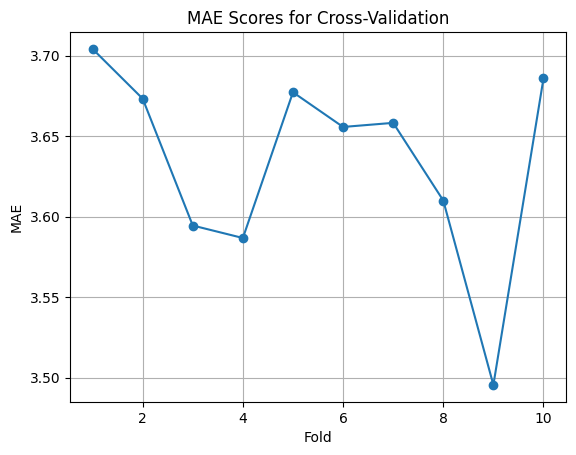

In [103]:
plt.plot(range(1, k + 1), result_lasso_MAE_values, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.title('MAE Scores for Cross-Validation')
plt.grid(True)

In [104]:
data_ridge = {

        'Before_cross_validation': [r2score_ridge,mse_ridge,mae_ridge],
        'After_cross_validation': [result_r2_ridge,result_ridge_mse,result_ridge_MAE]
}

In [105]:
Ridge_metrics = pd.DataFrame(data_ridge)

In [106]:
index = ['r2', 'MSE','MAE']
Ridge_metrics.index = index

In [107]:
Ridge_metrics

Before_cross_validation  After_cross_validation
r2                  0.923476                0.927698
MSE                20.737392               20.821002
MAE                 3.617632                3.634216

In [108]:
#DecisionTreeRegressor

In [109]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()

In [110]:
#Hyper Parameter tuning on DTR
param_grid = {
    'criterion': ['poisson', 'friedman_mse', 'squared_error', 'absolute_error'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [111]:
grid  = GridSearchCV(DTR,param_grid,cv = 5,n_jobs = -1)
grid.fit(X1_train,Y_train)
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [112]:
DTR = DecisionTreeRegressor(criterion = 'poisson', max_depth = 10, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 10)
DTR.fit(X1_train,Y_train)


DecisionTreeRegressor(criterion='poisson', max_depth=10, max_features='log2',
                      min_samples_split=10)

In [113]:
y_pred_DTR = DTR.predict(X_test_scaled)

In [114]:
y_pred_DTR

array([430.16319149, 429.4121875 , 452.400625  , ..., 446.97666667,
       445.77402597, 443.77912568])

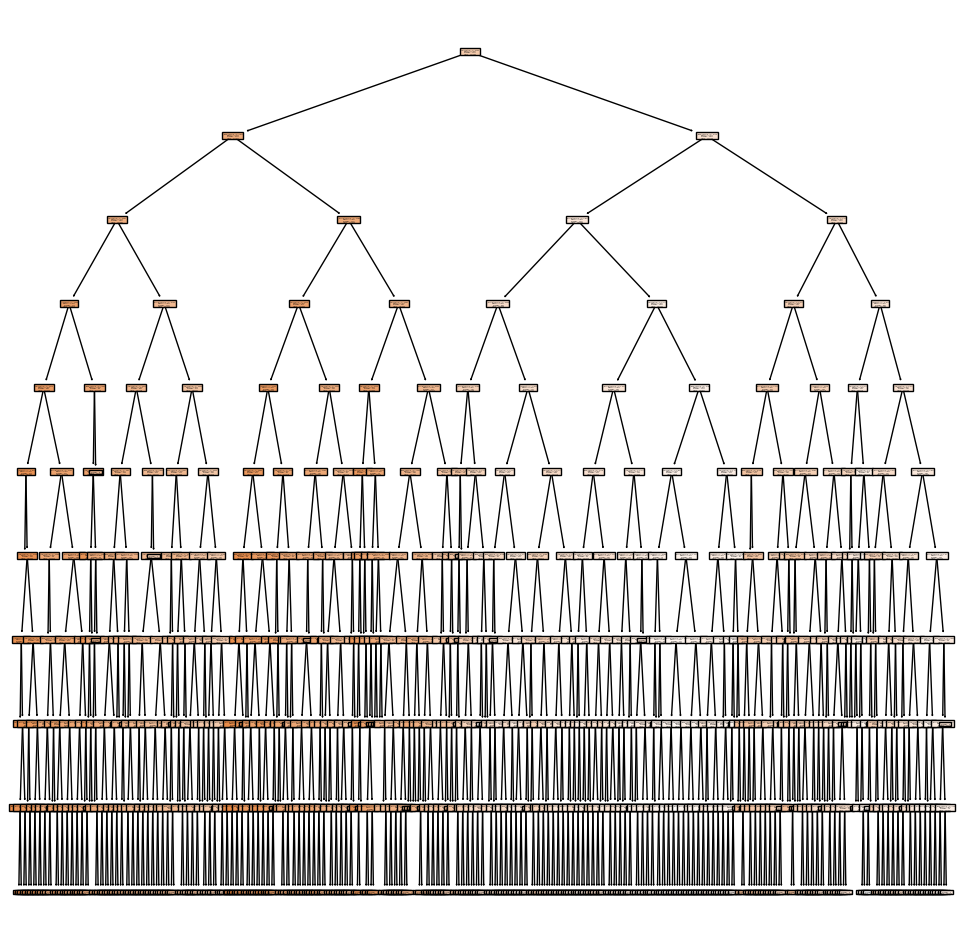

In [115]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,12))
plot_tree(DTR, feature_names=X1_train.columns, filled=True)
plt.show()

In [116]:
#metrics

In [117]:
from sklearn.metrics import mean_absolute_error
mse_DTR = mean_squared_error(Y_test,y_pred_DTR)
rmse_DTR = np.sqrt(mse_DTR)
mae_DTR = mean_absolute_error(Y_test, y_pred_DTR)
r2_DTR = r2_score(Y_test, y_pred_DTR)
print('MSE of the DecisionTreeREgressor', mse_DTR)
print("RMSE of the DecisionTreeRegresor",rmse_DTR)
print("mae of the DecisionTreeRegressor",mae_DTR)
print("r2 of hte DecisionTreeRegressor",r2_DTR)

MSE of the DecisionTreeREgressor 18.039398752075403
RMSE of the DecisionTreeRegresor 4.24728133658172
mae of the DecisionTreeRegressor 3.033937618672032
r2 of hte DecisionTreeRegressor 0.9395714272315907


In [118]:
#Cross_validation

In [119]:
k = 5
result_DTR = cross_val_score(DTR, X1_train,Y_train, cv=k)
result_mse_DTR = cross_val_score(DTR,X1_train,Y_train,cv = k, scoring = 'neg_mean_squared_error')
result_DTR_abs = cross_validate(DTR,X1_train,Y_train,cv=k, scoring = ['neg_mean_absolute_error', 'r2'])
result_mse_DTRvalues = -result_mse_DTR

In [120]:
result_mse_DTRvalues

array([18.32739404, 17.00453551, 20.90457202, 19.5491544 , 17.61012708])

In [121]:
result_DTR

array([0.93147938, 0.94196928, 0.9387083 , 0.93477958, 0.93283168])

In [122]:
result_DTR_abs

{'fit_time': array([0.02302027, 0.01569891, 0.01571274, 0.01617384, 0.01616716]),
 'score_time': array([0.006078  , 0.00444603, 0.00417686, 0.00402975, 0.00404501]),
 'test_neg_mean_absolute_error': array([-3.11725015, -3.18482961, -3.23809998, -3.19984808, -3.18710006]),
 'test_r2': array([0.93234759, 0.93407868, 0.93389482, 0.92916535, 0.93432811])}

In [123]:
result_DTR_MAE_values = -result_DTR_abs['test_neg_mean_absolute_error']
result_DTR_MAE = np.mean(result_DTR_MAE_values)

In [124]:
mse_DTR_values = np.mean(result_mse_DTRvalues)
result_r2_DTR = np.mean(result_DTR_abs['test_r2'])

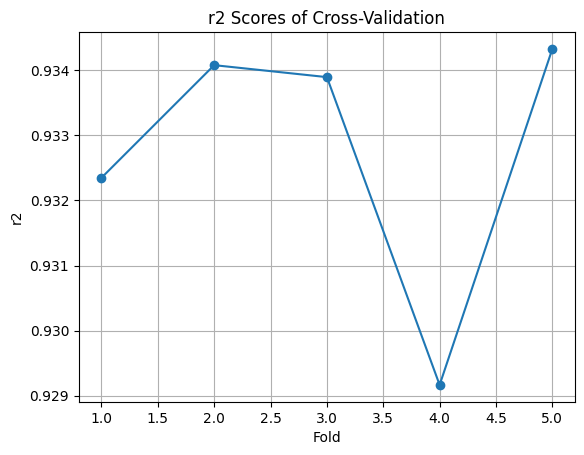

In [125]:
plt.plot(range(1, k + 1), result_DTR_abs['test_r2'], marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('r2')
plt.title('r2 Scores of Cross-Validation')
plt.grid(True)


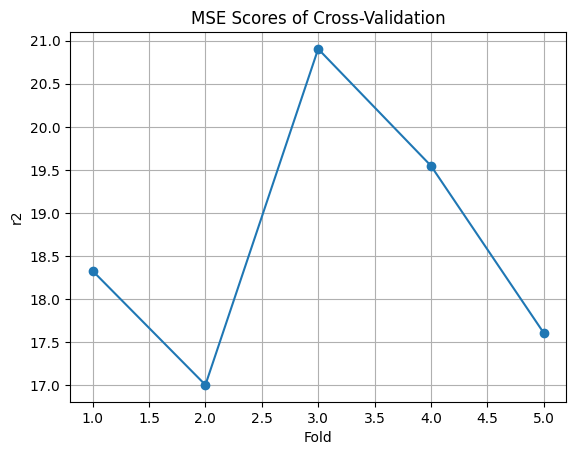

In [126]:
plt.plot(range(1, k + 1), result_mse_DTRvalues, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('r2')
plt.title('MSE Scores of Cross-Validation')
plt.grid(True)


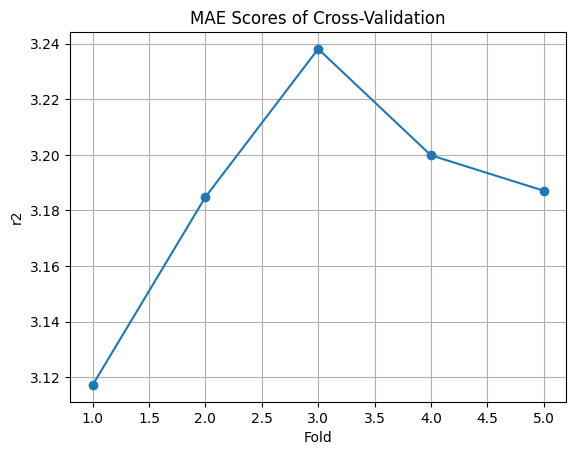

In [127]:
plt.plot(range(1, k + 1), result_DTR_MAE_values, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('r2')
plt.title('MAE Scores of Cross-Validation')
plt.grid(True)


In [128]:
Data_DTR = {

        'Before_cross_validation': [r2_DTR,mse_DTR,mae_DTR],
        'After_cross_validation': [result_r2_DTR,mse_DTR_values,result_DTR_MAE]
}

In [129]:
DTR_metrics = pd.DataFrame(Data_DTR)

In [130]:
index = ['r2', 'MSE','MAE']
DTR_metrics.index = index

In [131]:
DTR_metrics

Before_cross_validation  After_cross_validation
r2                  0.939571                0.932763
MSE                18.039399               18.679157
MAE                 3.033938                3.185426

In [132]:
#Random Forest Regressor

In [133]:
from sklearn.ensemble import RandomForestRegressor
RFE = RandomForestRegressor()

In [134]:
#Hyper Parameter Tunning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [136]:
grid = GridSearchCV(RFE, param_grid, cv = 5, n_jobs = -1)
grid.fit(X1_train,Y_train)
grid.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [137]:
RFE = RandomForestRegressor(n_estimators=200,max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2)
RFE.fit(X1_train, Y_train)

<ipython-input-137-0a70f7224d3a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFE.fit(X1_train, Y_train)


RandomForestRegressor(max_features='sqrt', n_estimators=200)

In [138]:
y_pred_RFE = RFE.predict(X_test_scaled)

In [139]:
y_pred_RFE

array([428.16415, 429.5097 , 452.3351 , ..., 438.64335, 443.9    ,
       443.0233 ])

In [141]:
feature_importance = RFE.feature_importances_


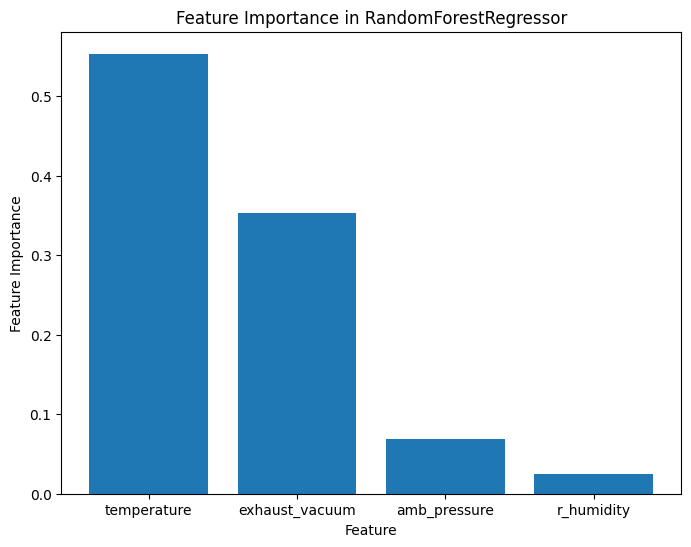

In [142]:
plt.figure(figsize=(8, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importance in RandomForestRegressor")
plt.show()

In [143]:
individual_tree =  RFE.estimators_[0]

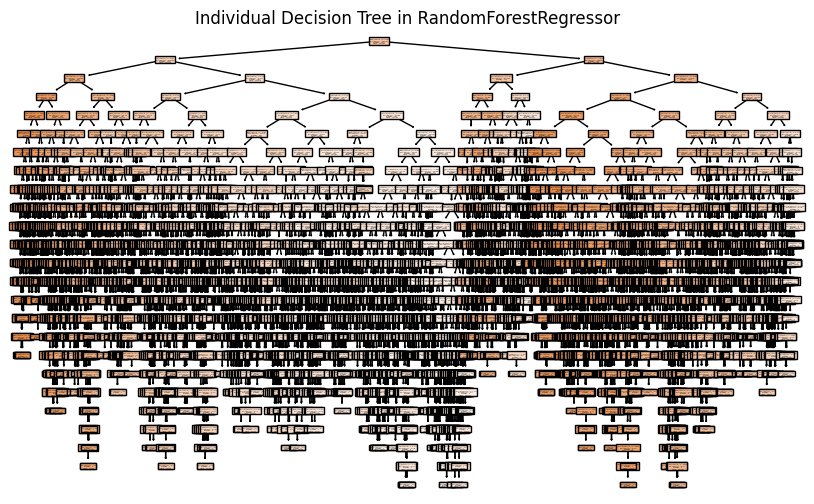

In [144]:
plt.figure(figsize=(10, 6))
plot_tree(individual_tree, feature_names=X1_train.columns, filled=True)
plt.title("Individual Decision Tree in RandomForestRegressor")
plt.show()

In [145]:
#metrics

In [146]:
mse_RFE = mean_squared_error(Y_test,y_pred_RFE)
rmse_RFE = np.sqrt(mse_RFE)
mae_RFE = mean_absolute_error(Y_test, y_pred_RFE)
r2_RFE = r2_score(Y_test, y_pred_RFE)
print('MSE of the DecisionTreeREgressor', mse_RFE)
print("RMSE of the DecisionTreeRegresor",rmse_RFE)
print("mae of the DecisionTreeRegressor",mae_RFE)
print("r2 of hte DecisionTreeRegressor",r2_RFE)

MSE of the DecisionTreeREgressor 10.740531458193988
RMSE of the DecisionTreeRegresor 3.2772750049689128
mae of the DecisionTreeRegressor 2.3097103260869596
r2 of hte DecisionTreeRegressor 0.9640212517216964


In [147]:
#Cross_validation

In [148]:
k = 5
result_RFE = cross_val_score(RFE, X1_train,Y_train, cv=k)
result_mse_RFE = cross_val_score(RFE,X1_train,Y_train,cv = k, scoring = 'neg_mean_squared_error')
result_RFE_abs = cross_validate(RFE,X1_train,Y_train,cv=k, scoring = ['neg_mean_absolute_error', 'r2'])
result_mse_RFEvalues = -result_mse_RFE
print("Accuracy scores",result_RFE)
print("Mean Squared errors",result_mse_RFEvalues)
print(result_RFE_abs )
result_RFE_r2 = result_RFE_abs['test_r2']
result_mae_values = result_RFE_abs['test_neg_mean_absolute_error']
results_mae = -result_mae_values
print("R2 values",result_RFE_r2 )
print("Mean Absolute errors", results_mae)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Accuracy scores [0.95769819 0.96274541 0.96172959 0.96140622 0.96233553]
Mean Squared errors [12.223981   11.10734821 11.48183916 11.10798835 10.45497444]
{'fit_time': array([5.90659237, 3.07499123, 2.51842189, 2.52678657, 2.53562474]), 'score_time': array([0.11061931, 0.10065055, 0.09695196, 0.09085846, 0.09332752]), 'test_neg_mean_absolute_error': array([-2.33334561, -2.38742331, -2.40493028, -2.43899293, -2.3694754 ]), 'test_r2': array([0.95755312, 0.96251051, 0.96212115, 0.96133997, 0.96244594])}
R2 values [0.95755312 0.96251051 0.96212115 0.96133997 0.96244594]
Mean Absolute errors [2.33334561 2.38742331 2.40493028 2.43899293 2.3694754 ]


In [149]:
print("R2 Averaged values", np.mean(result_RFE_r2))
print("MSE Average values", np.mean(result_mse_RFEvalues))
print("MAE Average values", np.mean(results_mae))

R2 Averaged values 0.9611941370880169
MSE Average values 11.275226234900833
MAE Average values 2.386833505837935


In [150]:
rmse = np.sqrt(result_mse_RFEvalues)
rmse

array([3.49628102, 3.33276885, 3.38848626, 3.33286489, 3.23341529])

In [151]:
print("RMSE Average values", np.mean(rmse))

RMSE Average values 3.3567632634290447


In [152]:
Data_RFE = {

        'Before_cross_validation': [0.96,10.74,2.31,3.23],
        'After_cross_validation': [0.96,11.21,2.39,3.35]
}

In [153]:
RFE_metrics = pd.DataFrame(Data_RFE)

In [154]:
index = ['r2', 'MSE','MAE','RMSE']
RFE_metrics.index = index

In [155]:
RFE_metrics

Before_cross_validation  After_cross_validation
r2                       0.96                    0.96
MSE                     10.74                   11.21
MAE                      2.31                    2.39
RMSE                     3.23                    3.35

In [156]:
#GradientBoostingRegressor

In [157]:
from sklearn.ensemble import GradientBoostingRegressor


In [158]:
GBR = GradientBoostingRegressor()


In [159]:
params = {
    'n_estimators': [50, 100, 200,300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [160]:
grid_GB = GridSearchCV(GBR,params,cv = 5)

In [161]:
grid_GB.fit(X1_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]})

In [162]:
grid_GB.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

In [163]:
GBR = GradientBoostingRegressor(n_estimators = 300, learning_rate = 0.2, max_depth = 5, min_samples_leaf  = 4,min_samples_split = 2)
GBR.fit(X1_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=4,
                          n_estimators=300)

In [164]:
y_pred_GBR = GBR.predict(X_test_scaled)

In [165]:
y_pred_GBR

array([427.65832469, 428.43333512, 453.3746443 , ..., 436.8082198 ,
       442.99620391, 441.84088273])

In [166]:
#metrics

In [167]:
mse_GBR = mean_squared_error(Y_test,y_pred_GBR)
rmse_GBR = np.sqrt(mse_GBR)
mae_GBR = mean_absolute_error(Y_test, y_pred_GBR)
r2_GBR = r2_score(Y_test, y_pred_GBR)
print('MSE of the DecisionTreeREgressor', mse_GBR)
print("RMSE of the DecisionTreeRegresor",rmse_GBR)
print("mae of the DecisionTreeRegressor",mae_GBR)
print("r2 of hte DecisionTreeRegressor",r2_GBR)

MSE of the DecisionTreeREgressor 9.80136425595114
RMSE of the DecisionTreeRegresor 3.1307130587058185
mae of the DecisionTreeRegressor 2.2052195631243485
r2 of hte DecisionTreeRegressor 0.9671672841589419


In [168]:
#Cross_Validation

In [169]:
k = 5
result_GBR = cross_val_score(GBR, X1_train,Y_train, cv=k)
result_mse_GBR = cross_val_score(GBR,X1_train,Y_train,cv = k, scoring = 'neg_mean_squared_error')
result_GBR_abs = cross_validate(GBR,X1_train,Y_train,cv=k, scoring = ['neg_mean_absolute_error', 'r2'])
result_mse_GBRvalues = -result_mse_GBR
print("Accuracy scores",result_GBR)
print("Mean Squared errors",result_mse_GBRvalues)
print(result_GBR_abs )
result_GBR_r2 = result_GBR_abs['test_r2']
result_mae_valuesGBR = result_GBR_abs['test_neg_mean_absolute_error']
results_maeGBR = -result_mae_valuesGBR
print("R2 values",result_GBR_r2 )
print("Mean Absolute errors", results_maeGBR)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Accuracy scores [0.95917474 0.96563029 0.96467514 0.96553692 0.96520708]
Mean Squared errors [11.67314537 10.10549285 10.53828325  9.93486212  9.64630827]
{'fit_time': array([3.78121185, 4.64406538, 3.79323149, 3.78237557, 4.67476439]), 'score_time': array([0.01289368, 0.01370192, 0.01275444, 0.01375675, 0.01416254]), 'test_neg_mean_absolute_error': array([-2.29716242, -2.29056809, -2.33633897, -2.32215522, -2.28080484]), 'test_r2': array([0.95921681, 0.96561608, 0.96474642, 0.9655497 , 0.96521121])}
R2 values [0.95921681 0.96561608 0.96474642 0.9655497  0.96521121]
Mean Absolute errors [2.29716242 2.29056809 2.33633897 2.32215522 2.28080484]


In [170]:
print("R2 Averaged values", np.mean(result_RFE_r2))
print("MSE Average values", np.mean(result_mse_RFEvalues))
print("MAE Average values", np.mean(results_mae))
rmse_GBR = np.sqrt(result_mse_RFEvalues)
rmse_GBR
print("RMSE Average values", np.mean(rmse))

R2 Averaged values 0.9611941370880169
MSE Average values 11.275226234900833
MAE Average values 2.386833505837935
RMSE Average values 3.3567632634290447


In [171]:
Data_GBR = {

        'Before_cross_validation': [0.96,9.8,2.20,3.13],
        'After_cross_validation': [0.96,11.25,2.39,3.35]
}
GBR_metrics = pd.DataFrame(Data_GBR)
index = ['r2', 'MSE','MAE','RMSE']
GBR_metrics.index = index


In [172]:
GBR_metrics

Before_cross_validation  After_cross_validation
r2                       0.96                    0.96
MSE                      9.80                   11.25
MAE                      2.20                    2.39
RMSE                     3.13                    3.35

In [173]:
#XGBBoost

In [174]:
import xgboost as xgb
xgmodel = xgb.XGBRegressor()

In [175]:
param_grid = {
    'objective': ['reg:squarederror', 'reg:squaredlogerror'],
    'max_depth': [3, 4, 5,6,7],
    'learning_rate': [0.01, 0.1, 0.2,0.3],
    'n_estimators': [50, 100, 200,300],
    'min_child_weight': [1, 2,3,4],
}


In [176]:
gridXG = GridSearchCV(xgmodel,param_grid,cv = 5, scoring='neg_mean_squared_error')
gridXG.fit(X1_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_child_weight': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 200, 300],
                         'objective': ['reg:squarederror',
                                       'reg:squaredlogerror']},
             scoring='neg_mean_squared_error')

In [256]:
best_params = gridXG.best_params_

In [257]:
best_params

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 2,
 'n_estimators': 300,
 'objective': 'reg:squarederror'}

In [178]:
xgb_model = xgb.XGBRegressor(**best_params)
xgb_model.fit(X1_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [179]:
Y_pred_XGB = xgb_model.predict(X_test_scaled)

In [180]:
Y_pred_XGB

array([427.00565, 429.41885, 453.46887, ..., 439.71146, 443.4871 ,
       441.87897], dtype=float32)

<Figure size 2000x1000 with 0 Axes>

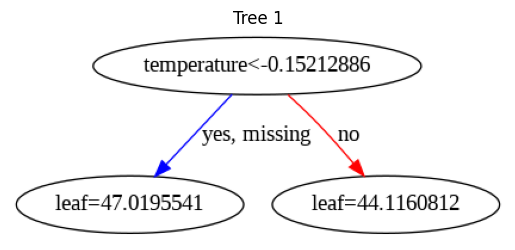

<Figure size 2000x1000 with 0 Axes>

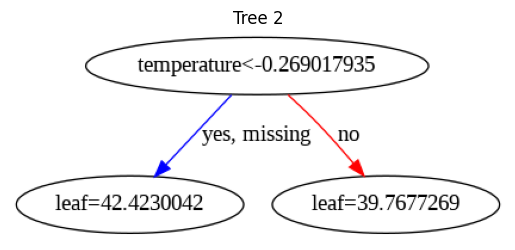

<Figure size 2000x1000 with 0 Axes>

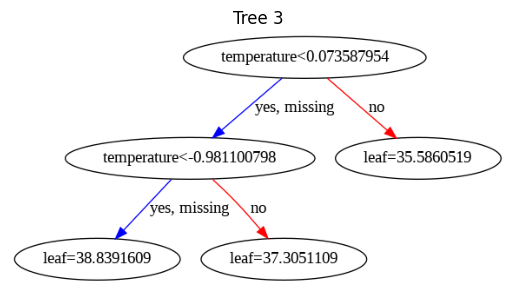

<Figure size 2000x1000 with 0 Axes>

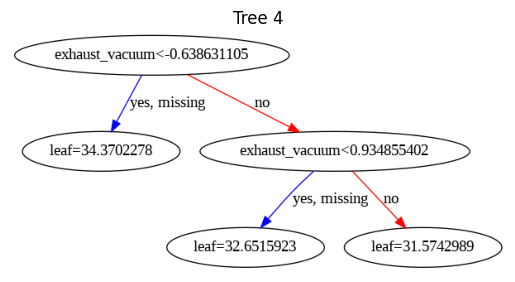

<Figure size 2000x1000 with 0 Axes>

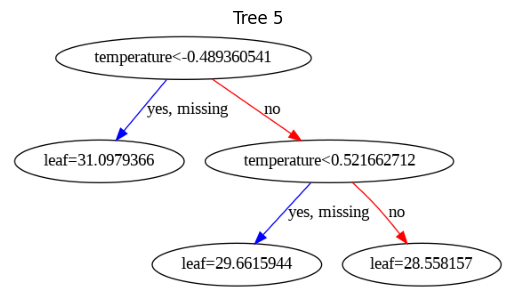

<Figure size 2000x1000 with 0 Axes>

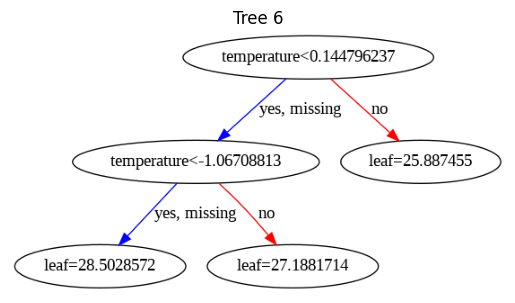

<Figure size 2000x1000 with 0 Axes>

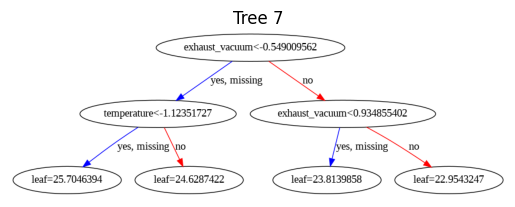

<Figure size 2000x1000 with 0 Axes>

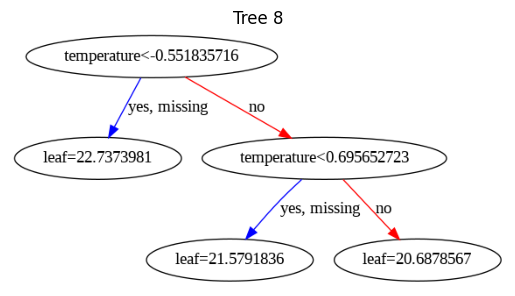

<Figure size 2000x1000 with 0 Axes>

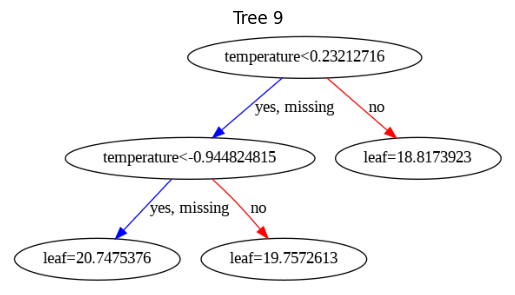

<Figure size 2000x1000 with 0 Axes>

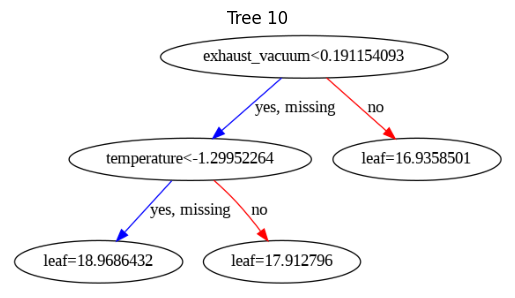

In [181]:
num_trees_to_plot = 10
for i in range(num_trees_to_plot):
    # Plot the current tree
    plt.figure(figsize=(20, 10))
    xgb.plot_tree(xgb_model, num_trees=i)
    plt.title(f"Tree {i + 1}")
    plt.show()

In [182]:
#metrics

In [183]:
mse_XGB = mean_squared_error(Y_test,Y_pred_XGB)
rmse_XGB = np.sqrt(mse_XGB)
mae_XGB = mean_absolute_error(Y_test, Y_pred_XGB)
r2_XGB = r2_score(Y_test, Y_pred_XGB)
print('MSE of the DecisionTreeREgressor', mse_XGB)
print("RMSE of the DecisionTreeRegresor",rmse_XGB)
print("mae of the DecisionTreeRegressor",mae_XGB)
print("r2 of the DecisionTreeRegressor",r2_XGB)

MSE of the DecisionTreeREgressor 9.474397215984347
RMSE of the DecisionTreeRegresor 3.0780508793690116
mae of the DecisionTreeRegressor 2.1600151638681666
r2 of the DecisionTreeRegressor 0.9682625618807247


In [184]:
#Cross_Validation

In [185]:
k = 10
result_XGB = cross_val_score(xgb_model, X1_train,Y_train, cv=k)
result_mse_XGB = cross_val_score(xgb_model,X1_train,Y_train,cv = k, scoring = 'neg_mean_squared_error')
result_XGB_abs = cross_validate(xgb_model,X1_train,Y_train,cv=k, scoring = ['neg_mean_absolute_error', 'r2'])
result_mse_XGBvalues = -result_mse_XGB
print("Accuracy scores",result_XGB)
print("Mean Squared errors",result_mse_XGBvalues)
print(result_XGB_abs )
result_XGB_r2 = result_XGB_abs['test_r2']
result_maeXGB_values = result_XGB_abs['test_neg_mean_absolute_error']
results_maeXGB = -result_maeXGB_values
print("R2 values",result_XGB_r2 )
print("Mean Absolute errors", results_maeXGB)
rmse_XGB = np.sqrt(result_mse_XGBvalues)
print("RMSE values",rmse_XGB)

Accuracy scores [0.9591161  0.96151452 0.96407211 0.97153917 0.96944037 0.96348135
 0.96581369 0.97218369 0.97021092 0.96321175]
Mean Squared errors [11.95298712 10.77184789 10.32377644  8.5468834   9.53906333 10.38163035
 10.10382436  7.78177574  8.30920744 10.04716044]
{'fit_time': array([1.79412746, 3.58987117, 1.80233955, 1.75621128, 1.76636887,
       1.75295067, 1.79472184, 3.59322286, 1.77279973, 1.78285265]), 'score_time': array([0.01157236, 0.01126742, 0.01146078, 0.01125264, 0.01185226,
       0.01154709, 0.01147985, 0.01146603, 0.01156902, 0.01170278]), 'test_neg_mean_absolute_error': array([-2.29914107, -2.23414566, -2.25471877, -2.1481679 , -2.24865124,
       -2.29201828, -2.24824323, -2.14028702, -2.12479675, -2.32311043]), 'test_r2': array([0.9591161 , 0.96151452, 0.96407211, 0.97153917, 0.96944037,
       0.96348135, 0.96581369, 0.97218369, 0.97021092, 0.96321175])}
R2 values [0.9591161  0.96151452 0.96407211 0.97153917 0.96944037 0.96348135
 0.96581369 0.97218369 0.97

In [186]:
print("R2 Averaged values", np.mean(result_XGB_r2))
print("MSE Average values", np.mean(result_mse_XGBvalues))
print("MAE Average values", np.mean(results_maeXGB))
print("RMSE values", np.mean(rmse_XGB))

R2 Averaged values 0.9660583670161241
MSE Average values 9.775815648820926
MAE Average values 2.231328034814138
RMSE values 3.120704843646066


In [187]:
Data_XGB = {

        'Before_cross_validation': [0.96,9.47,2.16,3.07],
        'After_cross_validation': [0.96,9.77,2.23,3.12]
}
XGB_metrics = pd.DataFrame(Data_XGB)
index = ['r2', 'MSE','MAE','RMSE']
XGB_metrics.index = index

In [188]:
XGB_metrics

Before_cross_validation  After_cross_validation
r2                       0.96                    0.96
MSE                      9.47                    9.77
MAE                      2.16                    2.23
RMSE                     3.07                    3.12

In [189]:
#KNN

In [190]:
from sklearn.neighbors import KNeighborsRegressor

In [191]:
KNN = KNeighborsRegressor()

In [192]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors (K)
    'weights': ['uniform', 'distance'],  # Weighting of neighbors
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

In [193]:
grid_search = GridSearchCV(KNN, param_grid, cv = 5)

In [194]:
grid_search.fit(X1_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [195]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [196]:
KNN = KNeighborsRegressor(metric = "manhattan", n_neighbors = 7, weights = 'distance')
KNN.fit(X1_train,Y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=7, weights='distance')

In [197]:
Y_pred_KNN = KNN.predict(X_test_scaled)

In [198]:
Y_pred_KNN

array([[427.44762645],
       [430.89494326],
       [452.01379482],
       ...,
       [440.36571747],
       [444.18590632],
       [440.95393156]])

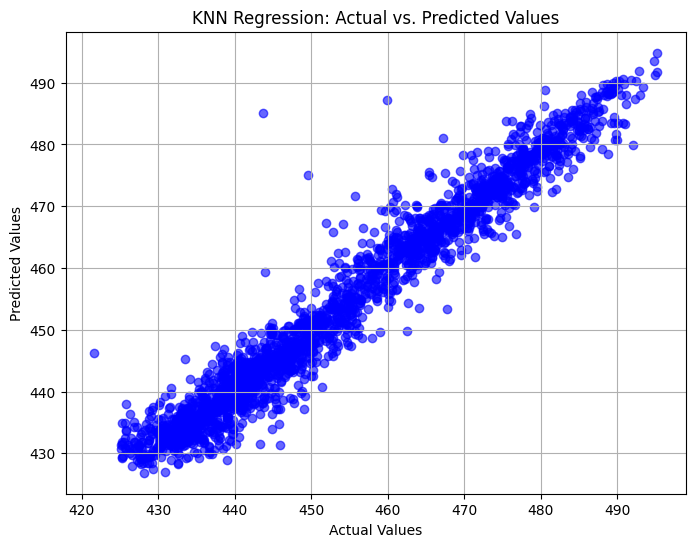

In [199]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_KNN, color='blue', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regression: Actual vs. Predicted Values")
plt.grid(True)
plt.show()

In [200]:
#metrics

In [201]:
mse_KNN = mean_squared_error(Y_test,Y_pred_KNN)
rmse_KNN = np.sqrt(mse_KNN)
mae_KNN = mean_absolute_error(Y_test, Y_pred_KNN)
r2_KNN = r2_score(Y_test, Y_pred_KNN)
print('MSE of the KNN' , mse_KNN)
print("RMSE of the KNN",rmse_KNN)
print("mae of the KNN",mae_KNN)
print("r2 of the KNN",r2_KNN)

MSE of the KNN 13.330110725571975
RMSE of the KNN 3.6510424162931847
mae of the KNN 2.5787960541333135
r2 of the KNN 0.9553466511239181


In [202]:
#Cross_validation

In [203]:
k = 10
result_KNN = cross_val_score(KNN, X1_train,Y_train, cv=k)
result_mse_KNN = cross_val_score(KNN,X1_train,Y_train,cv = k, scoring = 'neg_mean_squared_error')
result_KNN_abs = cross_validate(KNN,X1_train,Y_train,cv=k, scoring = ['neg_mean_absolute_error', 'r2'])
result_mse_KNNvalues = -result_mse_KNN
print("Accuracy scores",result_KNN)
print("Mean Squared errors",result_mse_KNNvalues)
print(result_KNN_abs )
result_KNN_r2 = result_KNN_abs['test_r2']
result_maeKNN_values = result_KNN_abs['test_neg_mean_absolute_error']
results_maeKNN = -result_maeKNN_values
print("R2 values",result_KNN_r2 )
print("Mean Absolute errors", results_maeKNN)
rmse_KNN = np.sqrt(result_mse_KNNvalues)
print("RMSE values",rmse_KNN)

Accuracy scores [0.95239444 0.94550902 0.95301724 0.96130728 0.96188564 0.95466774
 0.95252361 0.95127682 0.95894983 0.94883676]
Mean Squared errors [13.91816113 15.25168839 13.50036119 11.61955154 11.89724076 12.88718999
 14.03173023 13.63059462 11.45031545 13.97308387]
{'fit_time': array([0.00715375, 0.00624609, 0.00626087, 0.00636458, 0.00630641,
       0.00636411, 0.00636935, 0.00630116, 0.00621414, 0.00634265]), 'score_time': array([0.01221347, 0.01249433, 0.01356745, 0.01312566, 0.01204395,
       0.01246214, 0.01238632, 0.01209903, 0.01181555, 0.01226735]), 'test_neg_mean_absolute_error': array([-2.47831783, -2.59815341, -2.62323863, -2.55000653, -2.51576607,
       -2.59168144, -2.66104869, -2.6982436 , -2.4463723 , -2.69467524]), 'test_r2': array([0.95239444, 0.94550902, 0.95301724, 0.96130728, 0.96188564,
       0.95466774, 0.95252361, 0.95127682, 0.95894983, 0.94883676])}
R2 values [0.95239444 0.94550902 0.95301724 0.96130728 0.96188564 0.95466774
 0.95252361 0.95127682 0.95

In [204]:
print("R2 Averaged values", np.mean(result_KNN_r2))
print("MSE Average values", np.mean(result_mse_KNNvalues))
print("MAE Average values", np.mean(results_maeKNN))
print("RMSE values", np.mean(rmse_KNN))

R2 Averaged values 0.9540368390205887
MSE Average values 13.215991717331434
MAE Average values 2.5857503742325796
RMSE values 3.631793619253677


In [205]:
Data_KNN = {

        'Before_cross_validation': [0.95,13.33,2.57,3.65],
        'After_cross_validation': [0.96,13.21,2.58,3.63]
}
KNN_metrics = pd.DataFrame(Data_KNN)
index = ['r2', 'MSE','MAE','RMSE']
KNN_metrics.index = index

In [206]:
KNN_metrics

Before_cross_validation  After_cross_validation
r2                       0.95                    0.96
MSE                     13.33                   13.21
MAE                      2.57                    2.58
RMSE                     3.65                    3.63

In [207]:
#CatBoost Algorithm

In [209]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.4 MB/s eta 0:00:00


In [210]:
from catboost import CatBoostRegressor

In [211]:
catboost = CatBoostRegressor()

In [212]:
param_grid = {
    'iterations': [500, 1000, 1500],  # Number of iterations
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'depth': [4, 6, 8],  # Tree depth
    'l2_leaf_reg': [1, 3, 5]  # L2 regularization coefficient
}

In [213]:
grid_cat = GridSearchCV(catboost,param_grid, cv = 5)
grid_cat.fit(X1_train,Y_train)

Streaming output truncated to the last 5000 lines.
1000:	learn: 1.2174811	total: 5.82s	remaining: 2.9s
1001:	learn: 1.2166866	total: 5.83s	remaining: 2.9s
1002:	learn: 1.2158926	total: 5.84s	remaining: 2.89s
1003:	learn: 1.2149625	total: 5.84s	remaining: 2.89s
1004:	learn: 1.2144746	total: 5.86s	remaining: 2.88s
1005:	learn: 1.2135968	total: 5.87s	remaining: 2.88s
1006:	learn: 1.2125408	total: 5.88s	remaining: 2.88s
1007:	learn: 1.2116168	total: 5.89s	remaining: 2.88s
1008:	learn: 1.2107459	total: 5.9s	remaining: 2.87s
1009:	learn: 1.2098940	total: 5.91s	remaining: 2.87s
1010:	learn: 1.2092945	total: 5.92s	remaining: 2.86s
1011:	learn: 1.2082765	total: 5.93s	remaining: 2.86s
1012:	learn: 1.2077880	total: 5.94s	remaining: 2.85s
1013:	learn: 1.2065204	total: 5.95s	remaining: 2.85s
1014:	learn: 1.2056245	total: 5.96s	remaining: 2.85s
1015:	learn: 1.2052393	total: 5.96s	remaining: 2.84s
1016:	learn: 1.2044672	total: 5.97s	remaining: 2.83s
1017:	learn: 1.2032270	total: 5.97s	remaining: 2.83

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7af892a8f820>,
             param_grid={'depth': [4, 6, 8], 'iterations': [500, 1000, 1500],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.1, 0.2]})

In [214]:
grid_cat.best_params_

{'depth': 8, 'iterations': 1500, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [215]:
catboost = CatBoostRegressor(depth = 8, iterations = 1500, l2_leaf_reg = 1, learning_rate = 0.1)

In [216]:
catboost.fit(X1_train,Y_train)

0:	learn: 15.4853992	total: 22.3ms	remaining: 33.4s
1:	learn: 14.1464637	total: 63.6ms	remaining: 47.6s
2:	learn: 12.9330568	total: 94.6ms	remaining: 47.2s
3:	learn: 11.8545499	total: 118ms	remaining: 44.2s
4:	learn: 10.8670288	total: 140ms	remaining: 41.9s
5:	learn: 10.0083630	total: 159ms	remaining: 39.5s
6:	learn: 9.2304969	total: 180ms	remaining: 38.3s
7:	learn: 8.5519112	total: 199ms	remaining: 37.1s
8:	learn: 7.9543044	total: 221ms	remaining: 36.7s
9:	learn: 7.4211213	total: 226ms	remaining: 33.7s
10:	learn: 6.9501434	total: 239ms	remaining: 32.4s
11:	learn: 6.5378852	total: 250ms	remaining: 30.9s
12:	learn: 6.1735121	total: 256ms	remaining: 29.2s
13:	learn: 5.8573762	total: 260ms	remaining: 27.6s
14:	learn: 5.5821820	total: 265ms	remaining: 26.2s
15:	learn: 5.3513862	total: 278ms	remaining: 25.8s
16:	learn: 5.1473724	total: 291ms	remaining: 25.4s
17:	learn: 4.9742559	total: 303ms	remaining: 25s
18:	learn: 4.8262730	total: 315ms	remaining: 24.5s
19:	learn: 4.6950436	total: 325ms	

In [254]:
catboost.score(X1_train,Y_train)

0.995098636873701

In [217]:
Y_pred_cat = catboost.predict(X_test_scaled)

In [218]:
Y_pred_cat

array([428.04844246, 428.72188269, 452.56056911, ..., 438.91456968,
       444.27559543, 442.64034063])

In [219]:
X1_train

temperature exhaust_vacuum amb_pressure r_humidity
0       0.095757       0.173859     1.178095  -0.226991
1      -0.146083      -1.039176    -1.902222  -0.562658
2      -0.887724      -1.026598     1.506256   0.441596
3      -1.611899      -1.124081     3.098006  -0.148737
4      -0.124586      -0.091075    -0.000917   0.637230
...          ...            ...          ...        ...
7171    1.922988       2.033112    -0.501617  -1.144068
7172    1.263304       1.289411    -0.628483  -0.465184
7173   -1.728788      -1.268733     0.767047   0.533579
7174    0.286541      -0.950341    -0.039823  -0.406151
7175    0.446424      -0.731790    -0.178530  -1.547692

[7176 rows x 4 columns]

In [220]:
#metrics

In [221]:
mse_cat = mean_squared_error(Y_test,Y_pred_cat)
rmse_cat = np.sqrt(mse_cat)
mae_cat = mean_absolute_error(Y_test, Y_pred_cat)
r2_cat = r2_score(Y_test, Y_pred_cat)
print('MSE of the KNN' , mse_cat)
print("RMSE of the KNN",rmse_cat)
print("mae of the KNN",mae_cat)
print("r2 of the KNN",r2_cat)

MSE of the KNN 9.30966764290305
RMSE of the KNN 3.0511747971728935
mae of the KNN 2.1082490982072106
r2 of the KNN 0.9688143747837411


In [222]:
#Cross validation

In [223]:
k = 5
result_cat = cross_val_score(catboost, X1_train,Y_train, cv=k)
result_mse_cat = cross_val_score(catboost,X1_train,Y_train,cv = k, scoring = 'neg_mean_squared_error')
result_cat_abs = cross_validate(catboost,X1_train,Y_train,cv=k, scoring = ['neg_mean_absolute_error', 'r2'])
result_mse_catvalues = -result_mse_cat
print("Accuracy scores",result_cat)
print("Mean Squared errors",result_mse_catvalues)
print(result_cat_abs )
result_cat_r2 = result_cat_abs['test_r2']
result_maecat_values = result_cat_abs['test_neg_mean_absolute_error']
results_maecat = -result_maecat_values
print("R2 values",result_cat_r2 )
print("Mean Absolute errors", results_maecat)
rmse_cat = np.sqrt(result_mse_catvalues)
print("RMSE values",rmse_cat)

Streaming output truncated to the last 5000 lines.
1006:	learn: 1.3896792	total: 4.8s	remaining: 2.35s
1007:	learn: 1.3884788	total: 4.8s	remaining: 2.35s
1008:	learn: 1.3876236	total: 4.81s	remaining: 2.34s
1009:	learn: 1.3866670	total: 4.82s	remaining: 2.34s
1010:	learn: 1.3858436	total: 4.82s	remaining: 2.33s
1011:	learn: 1.3846899	total: 4.82s	remaining: 2.33s
1012:	learn: 1.3839920	total: 4.83s	remaining: 2.32s
1013:	learn: 1.3831684	total: 4.83s	remaining: 2.32s
1014:	learn: 1.3818006	total: 4.84s	remaining: 2.31s
1015:	learn: 1.3806900	total: 4.84s	remaining: 2.31s
1016:	learn: 1.3796899	total: 4.85s	remaining: 2.3s
1017:	learn: 1.3784674	total: 4.85s	remaining: 2.3s
1018:	learn: 1.3775241	total: 4.86s	remaining: 2.29s
1019:	learn: 1.3763628	total: 4.86s	remaining: 2.29s
1020:	learn: 1.3755903	total: 4.87s	remaining: 2.28s
1021:	learn: 1.3743964	total: 4.87s	remaining: 2.28s
1022:	learn: 1.3734678	total: 4.87s	remaining: 2.27s
1023:	learn: 1.3724332	total: 4.88s	remaining: 2.27s

In [224]:
print("R2 Averaged values", np.mean(result_cat_r2))
print("MSE Average values", np.mean(result_mse_catvalues))
print("MAE Average values", np.mean(results_maecat))
print("RMSE values", np.mean(rmse_cat))

R2 Averaged values 0.9664904363264792
MSE Average values 9.668162015491003
MAE Average values 2.1704711739062623
RMSE values 3.1079200637539777


In [225]:
Data_cat = {

        'Before_cross_validation': [0.96,9.3,2.10,3.05],
        'After_cross_validation': [0.96,9.66,2.17,3.10]
}
cat_metrics = pd.DataFrame(Data_cat)
index = ['r2', 'MSE','MAE','RMSE']
cat_metrics.index = index

In [226]:
cat_metrics

Before_cross_validation  After_cross_validation
r2                       0.96                    0.96
MSE                      9.30                    9.66
MAE                      2.10                    2.17
RMSE                     3.05                    3.10

In [227]:
#Robust Regression

In [228]:
from sklearn.linear_model import RANSACRegressor

In [229]:
ransac = RANSACRegressor()

In [230]:
param_grid = {
    'min_samples': [0.1, 0.2, 0.3],
    'max_trials': [100, 200, 300],
}

In [231]:
grid_search = GridSearchCV(ransac, param_grid, cv=5)
grid_search.fit(X1_train,Y_train)
grid_search.best_params_


{'max_trials': 200, 'min_samples': 0.2}

In [232]:
best_ransac = RANSACRegressor(max_trials = 300, min_samples = 0.1)
best_ransac.fit(X1_train,Y_train)

RANSACRegressor(max_trials=300, min_samples=0.1)

In [233]:
y_pred_ran = best_ransac.predict(X_test_scaled)

In [234]:
y_pred_ran

array([[429.4238404 ],
       [433.88208491],
       [454.97890764],
       ...,
       [442.97715844],
       [443.18711001],
       [443.23754961]])

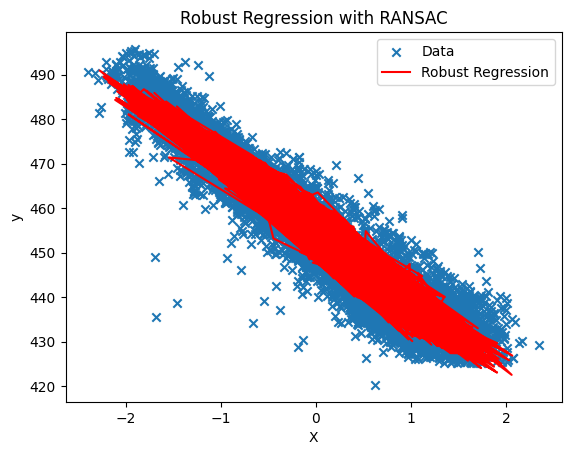

In [235]:
plt.scatter(X1_train['temperature'], Y_train, marker='x', label='Data')
plt.plot(X_test_scaled['temperature'], y_pred_ran, color='red', label='Robust Regression')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Robust Regression with RANSAC')
plt.show()

In [236]:
#metrics

In [237]:
mse_ran = mean_squared_error(Y_test,y_pred_ran)
rmse_ran = np.sqrt(mse_ran)
mae_ran = mean_absolute_error(Y_test, y_pred_ran)
r2_ran = r2_score(Y_test, y_pred_ran)
print('MSE of the KNN' , mse_ran)
print("RMSE of the KNN",rmse_ran)
print("mae of the KNN",mae_ran)
print("r2 of the KNN",r2_ran)

MSE of the KNN 20.70528438099545
RMSE of the KNN 4.550305965646206
mae of the KNN 3.6118305793360315
r2 of the KNN 0.9306412147597966


In [238]:
from sklearn.svm import SVR
svr = SVR()

In [239]:
svr.fit(X1_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [240]:
y_pred_svr = svr.predict(X_test_scaled)

In [241]:
y_pred_svr

array([432.99555337, 433.3134802 , 452.80524183, ..., 440.29974022,
       442.57195856, 441.98825414])

In [242]:
#metrics

In [243]:
mse_svr = mean_squared_error(Y_test,y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(Y_test, y_pred_svr)
r2_svr = r2_score(Y_test, y_pred_svr)
print('MSE of the KNN' , mse_svr)
print("RMSE of the KNN",rmse_svr)
print("mae of the KNN",mae_svr)
print("r2 of the KNN",r2_svr)

MSE of the KNN 17.761855482238527
RMSE of the KNN 4.214481638616845
mae of the KNN 3.168691293787046
r2 of the KNN 0.9405011446744068


In [244]:
#Cross validation

In [245]:
k = 5
result_svr = cross_val_score(svr, X1_train,Y_train, cv=k)
result_mse_svr = cross_val_score(svr,X1_train,Y_train,cv = k, scoring = 'neg_mean_squared_error')
result_svr_abs = cross_validate(svr,X1_train,Y_train,cv=k, scoring = ['neg_mean_absolute_error', 'r2'])
result_mse_svrvalues = -result_mse_svr
print("Accuracy scores",result_svr)
print("Mean Squared errors",result_mse_svrvalues)
print(result_svr_abs )
result_svr_r2 = result_svr_abs['test_r2']
result_maesvr_values = result_svr_abs['test_neg_mean_absolute_error']
results_maesvr = -result_maesvr_values
print("R2 values",result_svr_r2 )
print("Mean Absolute errors", results_maesvr)
rmse_svr = np.sqrt(result_mse_svrvalues)
print("RMSE values",rmse_svr)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Accuracy scores [0.93495873 0.941513   0.94137522 0.93961026 0.93719822]
Mean Squared errors [18.61380328 17.19650763 17.46921643 17.41804702 17.40588057]
{'fit_time': array([2.22192478, 1.5095849 , 1.53599977, 1.52893138, 1.54022741]), 'score_time': array([0.36989474, 0.3844943 , 0.3837502 , 0.37161922, 0.3722856 ]), 'test_neg_mean_absolute_error': array([-3.18167557, -3.16002538, -3.210416  , -3.21845197, -3.22271465]), 'test_r2': array([0.93495873, 0.941513  , 0.94137522, 0.93961026, 0.93719822])}
R2 values [0.93495873 0.941513   0.94137522 0.93961026 0.93719822]
Mean Absolute errors [3.18167557 3.16002538 3.210416   3.21845197 3.22271465]
RMSE values [4.31437171 4.14686721 4.17961917 4.17349338 4.17203554]


In [246]:
print("R2 Averaged values", np.mean(result_svr_r2))
print("MSE Average values", np.mean(result_mse_svrvalues))
print("MAE Average values", np.mean(results_maesvr))
print("RMSE values", np.mean(rmse_svr))

R2 Averaged values 0.9389310860580207
MSE Average values 17.620690985211557
MAE Average values 3.1986567148646023
RMSE values 4.197277403660908


In [247]:
Models = {
      'R2' : [92,92,92,92,93,96,96,96,96,96,93,93],
      'MSE' : [20.75,20.73,20.82,20.73,17.76,11.24,11.25,9.77,13.21,9.66,20.70,17.62],
      'MAE' : [3.75,3.61,3.63,3.63,3.14,2.39,2.39,2.23,2.58,2.17,3.61,3.19],
      'RMSE' : [4.55,4.55,4.55,3.63,4.30,3.35,3.35,3.12,3.64,3.10,3.61,4.19]

}
Model = pd.DataFrame(Models)
index = ['OLS','Linear Regression', 'Lasso Reggression', 'Ridge Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting', 'XGboost','KNN', 'catboost', 'Robust Regression', 'SVR']
Model.index = index

In [248]:
Model

R2    MSE   MAE  RMSE
OLS                      92  20.75  3.75  4.55
Linear Regression        92  20.73  3.61  4.55
Lasso Reggression        92  20.82  3.63  4.55
Ridge Regression         92  20.73  3.63  3.63
Decision Tree Regressor  93  17.76  3.14  4.30
Random Forest Regressor  96  11.24  2.39  3.35
Gradient Boosting        96  11.25  2.39  3.35
XGboost                  96   9.77  2.23  3.12
KNN                      96  13.21  2.58  3.64
catboost                 96   9.66  2.17  3.10
Robust Regression        93  20.70  3.61  3.61
SVR                      93  17.62  3.19  4.19

([<matplotlib.axis.XTick at 0x7af892896f20>,
 [Text(0.0, 0, 'OLS'),
  Text(1.0, 0, 'Linear Regression'),
  Text(2.0, 0, 'Lasso Reggression'),
  Text(3.0, 0, 'Ridge Regression'),
  Text(4.0, 0, 'Decision Tree Regressor'),
  Text(5.0, 0, 'Random Forest Regressor'),
  Text(6.0, 0, 'Gradient Boosting'),
  Text(7.0, 0, 'XGboost'),
  Text(8.0, 0, 'KNN'),
  Text(9.0, 0, 'catboost'),
  Text(10.0, 0, 'Robust Regression'),
  Text(11.0, 0, 'SVR')])

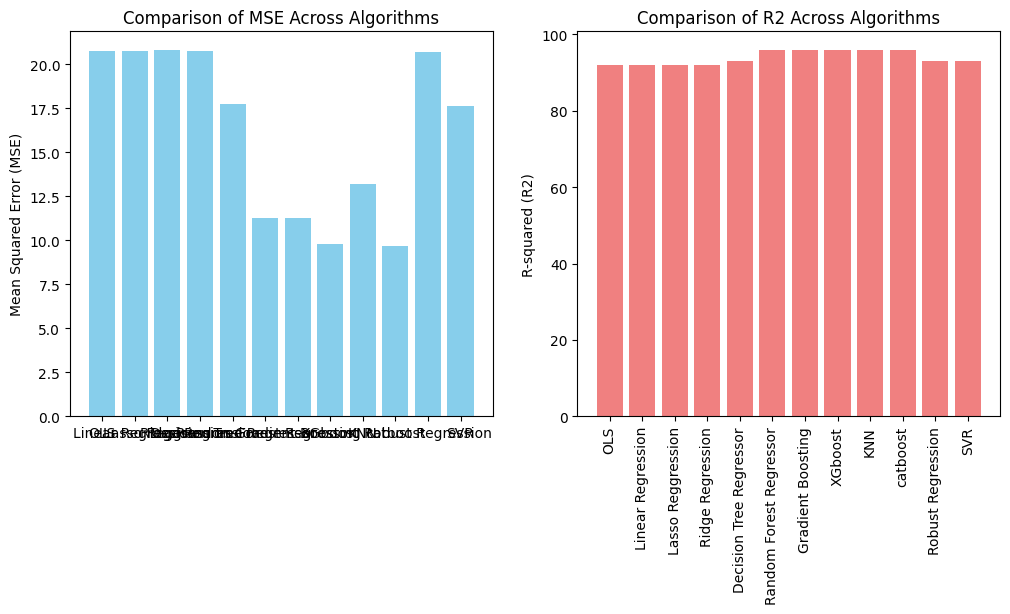

In [249]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Bar plot for Mean Squared Error (MSE)
axes[0].bar(Model.index, Model.MSE, color='skyblue')
axes[0].set_ylabel('Mean Squared Error (MSE)')
axes[0].set_title('Comparison of MSE Across Algorithms')


axes[1].bar(Model.index, Model.R2, color='lightcoral')
axes[1].set_ylabel('R-squared (R2)')
axes[1].set_title('Comparison of R2 Across Algorithms')
plt.xticks(Model.index,['OLS','Linear Regression', 'Lasso Reggression', 'Ridge Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting', 'XGboost','KNN', 'catboost', 'Robust Regression', 'SVR'], rotation = 90)


In [250]:
import pickle

In [251]:
pickle.dump(catboost,open('energy.pkl','wb') )

In [253]:
pickle_score = pickle.load(open('energy.pkl','rb'))
pickle_result = pickle_score.score(X1_train,Y_train)
print(pickle_result)

0.995098636873701


In [255]:
print(pickle_score)